<p style="font-size:3em">Customer Segmentation for a marketplace platform</p>

<br/>

This notebook corresponds to the first part of the **5th project of my data scientist path** with **OpenClassrooms/CentralSupelec** 

This project aims to provide the necessary skills to implement data clustering through unsupervised classification algorithm

This notebook contains the following steps:<br/>

* Data consolidation (Merge the 7 tables):
    * EDA of all the tables to understand which features to keep
    * Evaluation of the merging steps (notably aggration function) 
    * Feature cleaning/transformation
    * Merge all tables into a final dataset with customer as index


* Create a preprocessing pipeline function :
    * Choose a time range to be used (for example data from Jan2017 to Dec2017)
    * Create a usable table for our algorithms
___
<b>I strongly recommend to use the 'table of content' extension of Jupyter to navigate through this notebook </b>

In [164]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle
import datetime

%matplotlib inline

# Imports

In [119]:
%load_ext pycodestyle_magic

In [159]:
%pycodestyle_on

In [169]:
# %pycodestyle_off

In [126]:
pd.set_option('display.max_columns', 50)

In [165]:
customer = pd.read_csv("olist_customers_dataset.csv")
geoloc = pd.read_csv("olist_geolocation_dataset.csv")
order_payments = pd.read_csv("olist_order_payments_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
order_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
orders_dataset = pd.read_csv("olist_orders_dataset.csv")
products_dataset = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
cat_name_trans = pd.read_csv("product_category_name_translation.csv")

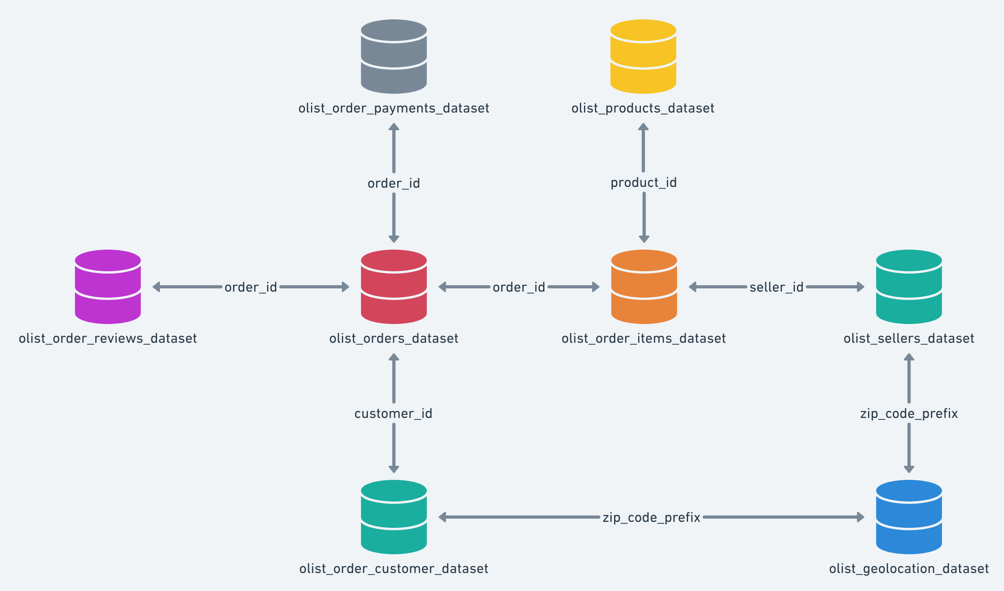

# Overview

## Customer table

In [16]:
customer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [129]:
print('Customer table:\n', customer.nunique(), '\n\n')
print(customer.info())

Customer table:
 customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


Text(0, 0.5, 'State')

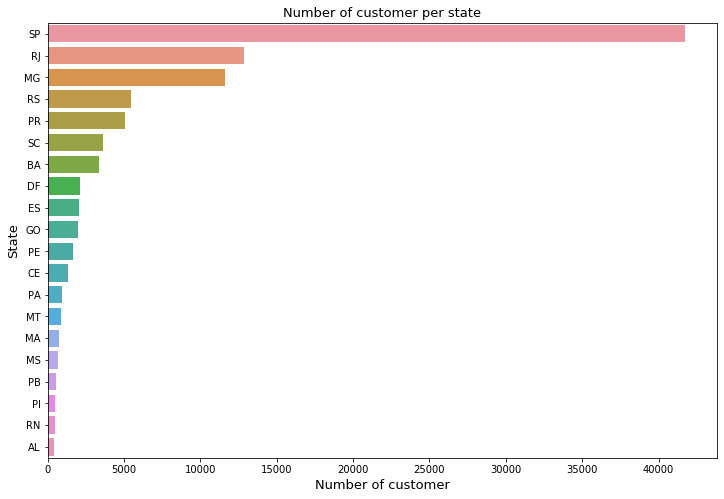

In [131]:
plt.figure(figsize=[12, 8])
sns.barplot(y=customer['customer_state'].value_counts().head(20).index,
            x=customer['customer_state'].value_counts().head(20).values)
plt.title('Number of customer per state', fontsize=13)
plt.xlabel('Number of customer', fontsize=13)
plt.ylabel('State', fontsize=13)

## Geoloc Table

### Overview

In [28]:
geoloc

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


### Pipeline Clean Geoloc

In [134]:
def cleaning_geoloc(data):
    data.drop(columns=['geolocation_city', 'geolocation_state'], inplace=True)
    return data

In [7]:
geoloc

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1037,-23.545621,-46.639292
1,1046,-23.546081,-46.644820
2,1046,-23.546129,-46.642951
3,1041,-23.544392,-46.639499
4,1035,-23.541578,-46.641607
...,...,...,...
1000158,99950,-28.068639,-52.010705
1000159,99900,-27.877125,-52.224882
1000160,99950,-28.071855,-52.014716
1000161,99980,-28.388932,-51.846871


## Order payments table 

### Overview

In [31]:
order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [66]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [32]:
order_payments.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [56]:
order_payments['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

Text(0.5, 1.0, 'Distribution of payment type (percentage) ')

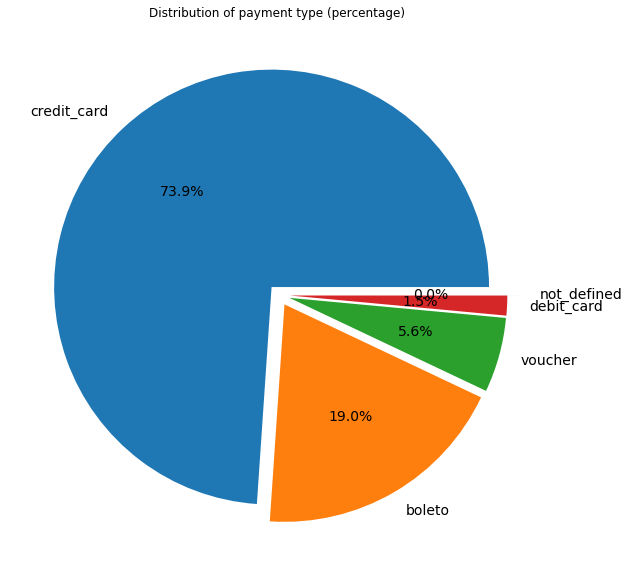

In [55]:
explode = (0.05,0.05,0.05,0.05,0.1)    

plt.figure(figsize=(14,10))

plt.pie(order_payments['payment_type'].value_counts().values,
        labels=order_payments['payment_type'].value_counts().index,
        explode=explode,
        autopct='%1.1f%%',
        textprops={'fontsize': 14})

plt.title('Distribution of payment type (percentage)')

In [59]:
order_payments.loc[~(order_payments['payment_type'] == 'credit_card'),
                   'payment_installments'].value_counts()

1    27091
Name: payment_installments, dtype: int64

___
payment installment can only be > 1 if payment type is credit card

In [43]:
order_payments.sort_values(by='order_id', ascending=True).head(50)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
85283,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19
2499,00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83
12393,000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87
32971,00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78
98711,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04
50570,00048cc3ae777c65dbb7d2a0634bc1ea,1,boleto,1,34.59
35027,00054e8431b9d7675808bcb819fb4a32,1,credit_card,1,31.75
22082,000576fe39319847cbb9d288c5617fa6,1,credit_card,10,880.75
100792,0005a1a1728c9d785b8e2b08b904576c,1,credit_card,3,157.60
63353,0005f50442cb953dcd1d21e1fb923495,1,credit_card,1,65.39


____
Thanks to rows 89575 and 80856 we can see that each line correspond at one payment method on a order_id with the corresponding payment value 

### Potential outliers

In [51]:
order_payments.loc[order_payments['payment_type'] == 'not_defined']    

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [61]:
order_items.loc[(order_items.order_id=='4637ca194b6387e2d538dc89b124b0ee')|
                (order_items.order_id=='00b1cb0320190ca0daa2c88b35206009')|
                (order_items.order_id=='c8c528189310eaa44a745b8d9d26908b')]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [63]:
orders_dataset.loc[(orders_dataset.order_id=='4637ca194b6387e2d538dc89b124b0ee')|
                   (orders_dataset.order_id=='00b1cb0320190ca0daa2c88b35206009')|
                   (orders_dataset.order_id=='c8c528189310eaa44a745b8d9d26908b')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
39919,4637ca194b6387e2d538dc89b124b0ee,a73c1f73f5772cf801434bf984b0b1a7,canceled,2018-09-03 14:14:25,NaN,NaN,NaN,2018-09-10 00:00:00
40235,c8c528189310eaa44a745b8d9d26908b,197a2a6a77da93f678ea0d379f21da0a,canceled,2018-08-28 20:05:14,NaN,NaN,NaN,2018-09-11 00:00:00


Not_defined payment_type corresponds to canceled orders, will be dropped afterwards

### Pipeline modify order_payments

The purpose of this section is to create a function which returns a table payment with one row per order_id 

In [67]:
# First testing the function before creating it
# First step : Removing not_defined payment_type
test_pay = order_payments.loc[~(order_payments['payment_type']=='not_defined')]


On this function, the output feature payment_sequential and payment_installments, will become boolean feature : 
    
    - multi_paytypes (which shows if the order was paid using multiple pay_types)
    - multi_installment (which shows if the order was paid all at once or via multiple installments)

In [143]:
# We change all the values of payment_sequential to 1, 
# when grouping by order_id, if there is more than one row, then all value greater than 1 will be multipayment

test_pay['payment_sequential'] = 1

In [ ]:
# Same idea here, changing payment_installments values 0 and 1 to 0, 
# this way all value greater than 0 will be multi_installment

test_pay.loc[test_pay['payment_installments']<2,'payment_installments'] = 0

In [82]:
test_pay['payment_installments'].value_counts()

0     52545
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
23        1
22        1
Name: payment_installments, dtype: int64

In [84]:
# Payment type will become a OneHotEncoding Feature

test_pay = pd.get_dummies(test_pay,columns=['payment_type'])
test_pay

,order_id,payment_sequential,payment_installments,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,b81ef226f3fe1789b1e8b2acac839d17,1,8,99.33,0,1,0,0
1,a9810da82917af2d9aefd1278f1dcfa0,1,0,24.39,0,1,0,0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,0,65.71,0,1,0,0
3,ba78997921bbcdc1373bb41e913ab953,1,8,107.78,0,1,0,0
4,42fdf880ba16b47b59251dd489d4441a,1,2,128.45,0,1,0,0
...,...,...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,0,363.31,1,0,0,0
103882,7b905861d7c825891d6347454ea7863f,1,2,96.80,0,1,0,0
103883,32609bbb3dd69b3c066a6860554a77bf,1,0,47.77,0,1,0,0
103884,b8b61059626efa996a60be9bb9320e10,1,5,369.54,0,1,0,0


In [95]:
# Groupby order_id

test_pay2 = test_pay.groupby(by='order_id').sum()
test_pay2

,payment_sequential,payment_installments,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
order_id,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,2,72.19,0,1,0,0
00018f77f2f0320c557190d7a144bdd3,1,3,259.83,0,1,0,0
000229ec398224ef6ca0657da4fc703e,1,5,216.87,0,1,0,0
00024acbcdf0a6daa1e931b038114c75,1,2,25.78,0,1,0,0
00042b26cf59d7ce69dfabb4e55b4fd9,1,3,218.04,0,1,0,0
...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,0,343.40,1,0,0,0
fffcd46ef2263f404302a634eb57f7eb,1,0,386.53,1,0,0,0
fffce4705a9662cd70adb13d4a31832d,1,3,116.85,0,1,0,0


In [97]:
# Transforming payment_sequential & payment_installments into two boolean features

test_pay2.loc[test_pay2['payment_sequential']==1,'payment_sequential']=0
test_pay2.loc[test_pay2['payment_sequential']>1,'payment_sequential']=1
test_pay2.rename(columns = {'payment_sequential':'multi_payment_types'}, inplace = True)

test_pay2.loc[test_pay2['payment_installments']==0,'payment_installments']=0
test_pay2.loc[test_pay2['payment_installments']>0,'payment_installments']=1
test_pay2.rename(columns = {'payment_installments':'multi_installments'}, inplace = True)

test_pay2

,multi_payments,multi_installments,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
order_id,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0,1,72.19,0,1,0,0
00018f77f2f0320c557190d7a144bdd3,0,1,259.83,0,1,0,0
000229ec398224ef6ca0657da4fc703e,0,1,216.87,0,1,0,0
00024acbcdf0a6daa1e931b038114c75,0,1,25.78,0,1,0,0
00042b26cf59d7ce69dfabb4e55b4fd9,0,1,218.04,0,1,0,0
...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,0,0,343.40,1,0,0,0
fffcd46ef2263f404302a634eb57f7eb,0,0,386.53,1,0,0,0
fffce4705a9662cd70adb13d4a31832d,0,1,116.85,0,1,0,0


In [98]:
test_pay2.multi_payments.value_counts()

0    96476
1     2961
Name: multi_payments, dtype: int64

In [17]:
# Saving the columns to avoid having new OHE features appearing in the future 

final_col=test_pay2.columns.tolist()
with open('final_col_pay.pickle', 'wb') as file:
    pickle.dump(final_col, file)

In [54]:
def clean_payments(data):
    
    data_return = data.copy()
    
    data_return = data_return.loc[~(data_return['payment_type']=='not_defined')]
    data_return['payment_sequential']=1
    data_return = pd.get_dummies(data_return,columns=['payment_type'])

    data_return = data_return.groupby(by='order_id').sum()
    
    data_return.loc[data_return['payment_sequential']==1,'payment_sequential']=0
    data_return.loc[data_return['payment_sequential']>1,'payment_sequential']=1
    data_return.rename(columns = {'payment_sequential':'multi_payment_types'}, inplace = True)

    data_return.loc[data_return['payment_installments']==0,'payment_installments']=0
    data_return.loc[data_return['payment_installments']>0,'payment_installments']=1
    data_return.rename(columns = {'payment_installments':'multi_installments'}, inplace = True)

    with open('final_col_pay.pickle', 'rb') as file:
        final_col=pickle.load(file)
    data_return = data_return.reindex(columns=final_col)
    
    #Fill in the NaN of potential OHE payment type which is not found in new dataset 
    data_return.fillna(0,inplace=True)
    
    return data_return

In [55]:
to_clean = order_payments.copy()
to_clean


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [56]:
cleaned_order_payments = clean_payments(to_clean)
cleaned_order_payments

,multi_payment_types,multi_installments,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
order_id,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0,1,72.19,0,1,0,0
00018f77f2f0320c557190d7a144bdd3,0,1,259.83,0,1,0,0
000229ec398224ef6ca0657da4fc703e,0,1,216.87,0,1,0,0
00024acbcdf0a6daa1e931b038114c75,0,1,25.78,0,1,0,0
00042b26cf59d7ce69dfabb4e55b4fd9,0,1,218.04,0,1,0,0
...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,0,1,343.40,1,0,0,0
fffcd46ef2263f404302a634eb57f7eb,0,1,386.53,1,0,0,0
fffce4705a9662cd70adb13d4a31832d,0,1,116.85,0,1,0,0


### Checking distribution of payments values

Text(0.5, 1.0, 'Distribution of payment value per order')

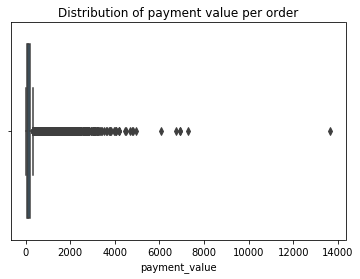

In [58]:
sns.boxplot(cleaned_order_payments['payment_value'])
plt.title('Distribution of payment value per order')

Text(0.5, 1.0, 'Distribution of payment value per order (without 5% highest values)')

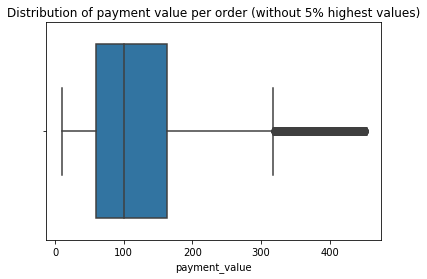

In [79]:
# We will not drop the outliers here, but let's check the payment values without the highest values
# Purpose is to understand where are most of our orders' payment_value 

sns.boxplot(cleaned_order_payments.loc[cleaned_order_payments['payment_value']<
                                       cleaned_order_payments['payment_value'].quantile(0.95),'payment_value'])
plt.title('Distribution of payment value per order (without 5% highest values)')

In [22]:
cleaned_order_payments['payment_value'].describe()

count    99437.000000
mean       160.995124
std        221.952843
min          9.590000
25%         62.010000
50%        105.290000
75%        176.970000
max      13664.080000
Name: payment_value, dtype: float64

### Observ the highest payment_values 

In [43]:
highest_prices=cleaned_order_payments.sort_values(by='payment_value',ascending=False).head(10).index.tolist()

In [45]:
order_items.loc[order_items['order_id'].isin(highest_prices)]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
1647,03caa2c082116e1d31e67e9ae3700499,1,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.00,28.01
1648,03caa2c082116e1d31e67e9ae3700499,2,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.00,28.01
1649,03caa2c082116e1d31e67e9ae3700499,3,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.00,28.01
1650,03caa2c082116e1d31e67e9ae3700499,4,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.00,28.01
1651,03caa2c082116e1d31e67e9ae3700499,5,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.00,28.01
1652,03caa2c082116e1d31e67e9ae3700499,6,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.00,28.01
1653,03caa2c082116e1d31e67e9ae3700499,7,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.00,28.01
1654,03caa2c082116e1d31e67e9ae3700499,8,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.00,28.01
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34


## Order Items table

In [13]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [94]:
# Checking correspondance of highest prices (see table of highest payment_values in the section above)

order_items.price.sort_values(ascending=False)

3556      6735.00
112233    6729.00
107841    6499.00
74336     4799.00
11249     4690.00
           ...   
57302        1.20
57297        1.20
48625        0.85
87081        0.85
27652        0.85
Name: price, Length: 112650, dtype: float64

In [119]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [36]:
order_items.loc[order_items['order_item_id']==8]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
1654,03caa2c082116e1d31e67e9ae3700499,8,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.00,28.01
2039,04993613aee4046caf92ea17b316dcfb,8,96d1c06692244e2fed6e1f9aa9552770,00ee68308b45bc5e2660cd833c3f81cc,2018-02-07 02:52:44,62.00,10.54
11939,1b15974a0141d54e36626dca3fdc731a,8,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.00,10.12
19213,2c2a19b5703863c908512d135aa6accc,8,03e1c946c0ddfc58724ff262aef08dff,98dac6635aee4995d501a3972e047414,2017-10-18 04:26:49,20.70,16.11
21296,30bdf3d824d824610a49887486debcaf,8,dbb67791e405873b259e4656bf971246,9c0e69c7bf2619675bbadf47b43f655a,2018-04-03 14:47:43,81.99,14.51
24557,37ee401157a3a0b28c9c6d0ed8c3b24b,8,d34c07a2d817ac73f4caf8c574215fed,e7d5b006eb624f13074497221eb37807,2018-04-19 02:30:52,29.99,7.39
25571,3a213fcdfe7d98be74ea0dc05a8b31ae,8,a62e25e09e05e6faf31d90c6ec1aa3d1,634964b17796e64304cadf1ad3050fb7,2018-01-18 02:11:05,108.00,15.52
26693,3cb5915708fd5b47246994508f858ffd,8,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2017-11-23 02:29:03,59.90,17.67
29264,428a2f660dc84138d969ccd69a0ab6d5,8,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
33090,4affd1928d3900a415e9886a179d5124,8,d90e83fe1a0e31440db1dc015f1c1512,d2374cbcbb3ca4ab1086534108cc3ab7,2018-04-23 05:50:20,19.90,18.23


In [37]:
order_items.loc[order_items['order_id']=='37ee401157a3a0b28c9c6d0ed8c3b24b']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
24550,37ee401157a3a0b28c9c6d0ed8c3b24b,1,d34c07a2d817ac73f4caf8c574215fed,e7d5b006eb624f13074497221eb37807,2018-04-19 02:30:52,29.99,7.39
24551,37ee401157a3a0b28c9c6d0ed8c3b24b,2,d34c07a2d817ac73f4caf8c574215fed,e7d5b006eb624f13074497221eb37807,2018-04-19 02:30:52,29.99,7.39
24552,37ee401157a3a0b28c9c6d0ed8c3b24b,3,d34c07a2d817ac73f4caf8c574215fed,e7d5b006eb624f13074497221eb37807,2018-04-19 02:30:52,29.99,7.39
24553,37ee401157a3a0b28c9c6d0ed8c3b24b,4,d34c07a2d817ac73f4caf8c574215fed,e7d5b006eb624f13074497221eb37807,2018-04-19 02:30:52,29.99,7.39
24554,37ee401157a3a0b28c9c6d0ed8c3b24b,5,d34c07a2d817ac73f4caf8c574215fed,e7d5b006eb624f13074497221eb37807,2018-04-19 02:30:52,29.99,7.39
24555,37ee401157a3a0b28c9c6d0ed8c3b24b,6,d34c07a2d817ac73f4caf8c574215fed,e7d5b006eb624f13074497221eb37807,2018-04-19 02:30:52,29.99,7.39
24556,37ee401157a3a0b28c9c6d0ed8c3b24b,7,d34c07a2d817ac73f4caf8c574215fed,e7d5b006eb624f13074497221eb37807,2018-04-19 02:30:52,29.99,7.39
24557,37ee401157a3a0b28c9c6d0ed8c3b24b,8,d34c07a2d817ac73f4caf8c574215fed,e7d5b006eb624f13074497221eb37807,2018-04-19 02:30:52,29.99,7.39
24558,37ee401157a3a0b28c9c6d0ed8c3b24b,9,d34c07a2d817ac73f4caf8c574215fed,e7d5b006eb624f13074497221eb37807,2018-04-19 02:30:52,29.99,7.39
24559,37ee401157a3a0b28c9c6d0ed8c3b24b,10,d34c07a2d817ac73f4caf8c574215fed,e7d5b006eb624f13074497221eb37807,2018-04-19 02:30:52,29.99,7.39


## Order reviews table

In [101]:
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [54]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [103]:
order_reviews.groupby(by='order_id').count()['review_id'].value_counts()

1    98886
2      551
3        4
Name: review_id, dtype: int64

Text(0.5, 1.0, 'Distribution of review score')

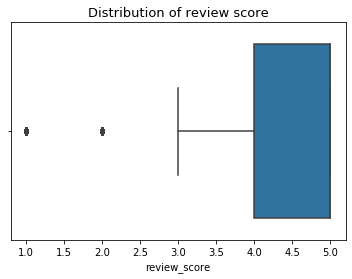

In [53]:
sns.boxplot(order_reviews['review_score'])
plt.title('Distribution of review score',fontsize=13)

## Orders table 

In [15]:
orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [194]:
# Create a function to calculate difference between two dates and adding it at the end of the table

def calculate_days_difference(data,column_start,column_end,new_col_name):
    data[column_end]=data[column_end].astype('datetime64')
    data[column_start]=data[column_start].astype('datetime64')

    data[new_col_name] = data[column_end] - data[column_start]
    data[new_col_name]=data[new_col_name]/np.timedelta64(1,'h')/24
    
    return data 

In [171]:
test_diff= orders_dataset.copy()


In [173]:
test_diff = calculate_days_difference(test_diff,
                                       'order_purchase_timestamp',
                                       'order_delivered_customer_date',
                                       'days_difference')
test_diff

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_difference
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8.436574
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,13.782037
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.394213
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,13.208750
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2.873877
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,8.218009
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,22.193727
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,24.859421
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,17.086424


In [88]:
# Checking the distribution of the feature order_status
orders_dataset['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

___
We will drop the canceled and unavailable values 

## Products table

In [167]:
products_dataset

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [166]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


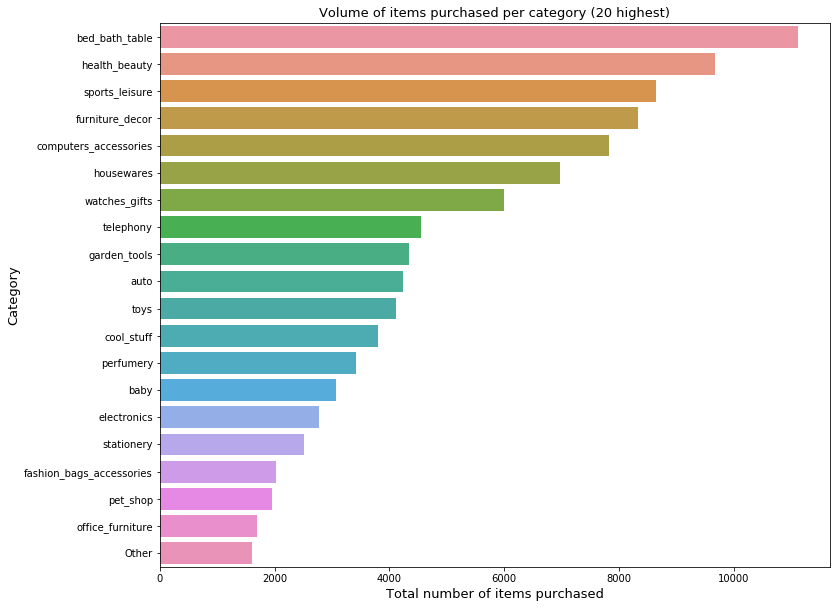

In [170]:
# Overview of the amount of items sold per category

view_category = order_items.merge(products_dataset.loc[:,['product_id','product_category_name']],
                                  on='product_id',
                                  how='left')

dict_cat_name = pd.Series(cat_name_trans.product_category_name_english.values,
                          index=cat_name_trans.product_category_name).to_dict()
dict_cat_name['pc_gamer']='pc_gamer'
dict_cat_name['portateis_cozinha_e_preparadores_de_alimentos']='small_appliances_food_preparation'


view_category['product_category_name']=view_category['product_category_name'].map(dict_cat_name).fillna('Other')
view_category['product_category_name']

plt.figure(figsize=[12,10])
plt.title('Volume of items purchased per category (20 highest)',fontsize=13)
plt.xlabel('Total number of items purchased',fontsize=13)
plt.ylabel('Category',fontsize=13)

sns.barplot(x=view_category['product_category_name'].value_counts().head(20).values,
            y=view_category['product_category_name'].value_counts().head(20).index)
            


In [173]:
items_20best = view_category['product_category_name'].value_counts().head(20).values.sum()
a = np.around(items_20best/view_category.shape[0]*100,1)
b = 100 - np.around(items_20best / view_category.shape[0] * 100, 1)
print(a,'% of items sold are from the 20 best sellers category.\n')
print('It means that 50 categories represents only {}% of total items sold'.format(b))
a


87.5

In [174]:
b

12.5

**87.5%** of items sold are from the **20 best sellers category**.

It means that **50 categories** represents only **12.5%** of total items sold.

## Sellers table

In [17]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


## Categories name translation table 

In [18]:
cat_name_trans

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


## Overview cross table 

### PO Per Month

In [57]:
orders_dataset['order_purchase_timestamp']=orders_dataset['order_purchase_timestamp'].astype('datetime64')

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
dtype: object

In [66]:
visu_PO=orders_dataset.merge(customer,on='customer_id',how='left')
visu_PO= visu_PO[visu_PO['order_purchase_timestamp'].dt.strftime('%Y').isin(['2017','2018'])]
visu_PO

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [67]:
visu_PO.sort_values(by='order_purchase_timestamp',ascending=True,inplace=True)
visu_PO['purchasing_month']=visu_PO['order_purchase_timestamp'].dt.strftime('%Y-%m')
visu_PO = visu_PO.groupby(by='purchasing_month').nunique()
visu_PO

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,purchasing_month
purchasing_month,,,,,,,,,,,,,
2017-01,800,800,6,793,783,706,745,44,765,713,370,24,1
2017-02,1780,1780,7,1776,1721,1551,1638,50,1755,1530,640,27,1
2017-03,2682,2682,6,2674,2623,2438,2526,49,2642,2217,802,27,1
2017-04,2404,2404,7,2394,2327,2207,2280,47,2372,1997,787,26,1
2017-05,3700,3700,6,3677,3558,3304,3509,51,3625,2847,981,27,1
2017-06,3245,3245,6,3231,3176,2874,3103,47,3180,2588,899,27,1
2017-07,4026,4026,6,4004,3903,3516,3822,46,3947,3038,1007,27,1
2017-08,4331,4331,6,4303,4253,3843,4140,50,4246,3201,1023,26,1
2017-09,4285,4285,6,4264,4184,3935,4127,49,4212,3226,1081,27,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text xticklabel objects>)

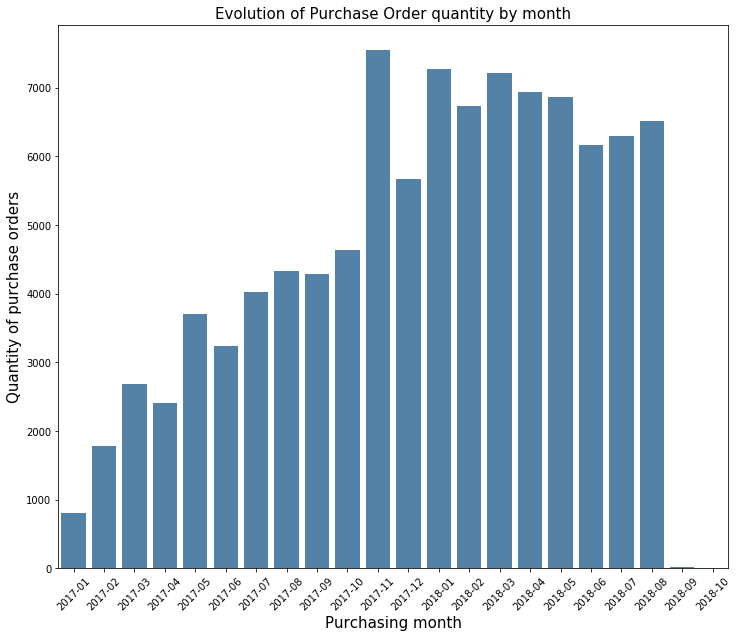

In [68]:
plt.figure(figsize=[12,10])
sns.barplot(x=visu_PO.index,y=visu_PO['order_id'],color='steelblue')
plt.title('Evolution of Purchase Order quantity by month',fontsize=15)
plt.ylabel('Quantity of purchase orders',fontsize=15)
plt.xlabel('Purchasing month',fontsize=15)
plt.xticks(rotation=45)

### PO per customer 

In [74]:
orders_dataset['order_purchase_timestamp']=orders_dataset['order_purchase_timestamp'].astype('datetime64')

In [75]:
visu_PO=orders_dataset.merge(customer,on='customer_id',how='left')
visu_PO= visu_PO[visu_PO['order_purchase_timestamp'].dt.strftime('%Y').isin(['2017','2018'])]
visu_PO

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [76]:
PO_per_cust = visu_PO.groupby('customer_unique_id').nunique()

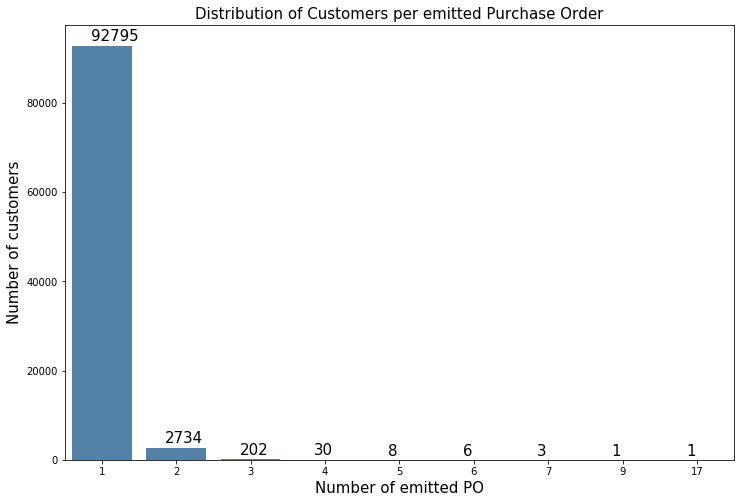

In [77]:
plt.figure(figsize=[12,8])
sns.barplot(x=PO_per_cust.order_id.value_counts().index,
            y=PO_per_cust.order_id.value_counts().values,
            color='steelblue')
plt.title('Distribution of Customers per emitted Purchase Order',fontsize=15)
plt.ylabel('Number of customers',fontsize=15)
plt.xlabel('Number of emitted PO',fontsize=15)

for index, value in enumerate(PO_per_cust.order_id.value_counts()):
    plt.text(index-0.15, value+1000, str(value),fontsize=15)

# Merge Table [Manually]

This "map" i drew helped me understanding which feature i could get out of each table 
___

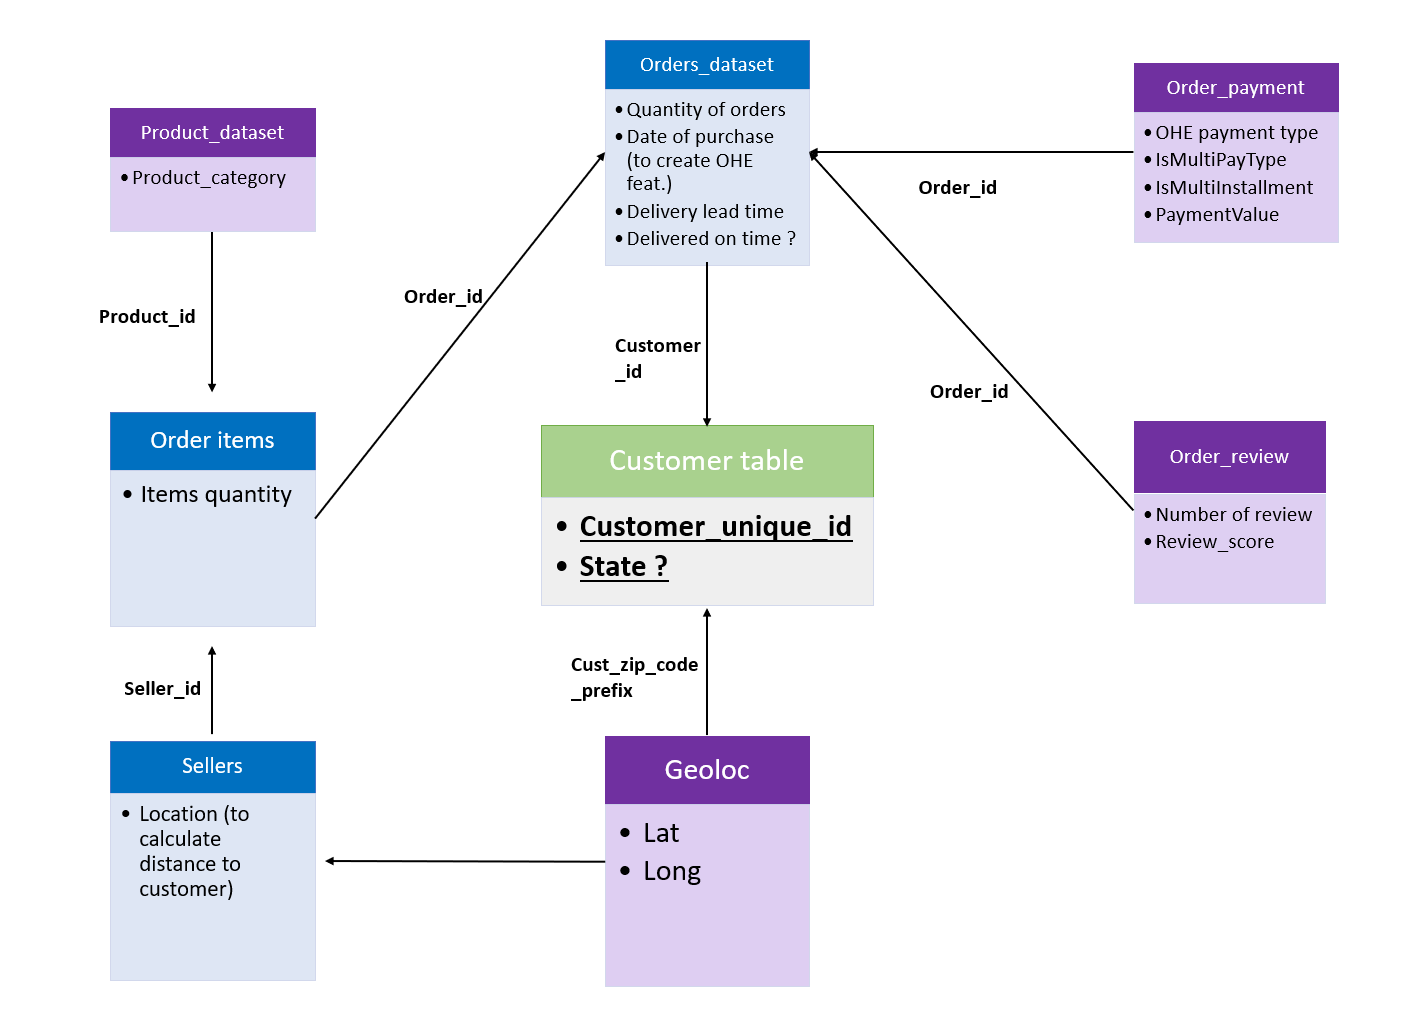

In the following section, i will go through every step i need to transform the 8 input tables 
into a final table with customer_unique_id as an index

## Correspondance Order_id - Customer_unique_id

In [106]:
# First create a correspondance table between order_id and customer_unique_id

order_customer = orders_dataset.loc[:,['order_id','customer_id']]
order_customer = order_customer.merge(customer.loc[:,['customer_id','customer_unique_id']],on='customer_id',how='left')
order_customer.drop(columns='customer_id',inplace=True)

In [107]:
order_customer

,order_id,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6
...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,6359f309b166b0196dbf7ad2ac62bb5a
99437,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660
99438,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30
99439,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c


## Products Table - Category name 

In [81]:
# Create a dictionnary to translate product cat name into english names

dict_cat_name = pd.Series(cat_name_trans.product_category_name_english.values,
                          index=cat_name_trans.product_category_name).to_dict()
dict_cat_name

{'beleza_saude': 'health_beauty',
 'informatica_acessorios': 'computers_accessories',
 'automotivo': 'auto',
 'cama_mesa_banho': 'bed_bath_table',
 'moveis_decoracao': 'furniture_decor',
 'esporte_lazer': 'sports_leisure',
 'perfumaria': 'perfumery',
 'utilidades_domesticas': 'housewares',
 'telefonia': 'telephony',
 'relogios_presentes': 'watches_gifts',
 'alimentos_bebidas': 'food_drink',
 'bebes': 'baby',
 'papelaria': 'stationery',
 'tablets_impressao_imagem': 'tablets_printing_image',
 'brinquedos': 'toys',
 'telefonia_fixa': 'fixed_telephony',
 'ferramentas_jardim': 'garden_tools',
 'fashion_bolsas_e_acessorios': 'fashion_bags_accessories',
 'eletroportateis': 'small_appliances',
 'consoles_games': 'consoles_games',
 'audio': 'audio',
 'fashion_calcados': 'fashion_shoes',
 'cool_stuff': 'cool_stuff',
 'malas_acessorios': 'luggage_accessories',
 'climatizacao': 'air_conditioning',
 'construcao_ferramentas_construcao': 'construction_tools_construction',
 'moveis_cozinha_area_de_ser

In [84]:
# Checking if this dictionnary has as much categories as the products table
products_dataset['product_category_name'].nunique()

73

In [86]:
len(dict_cat_name)

71

We have 2 categories missing in our dictionnary 

In [85]:
dict=list(dict_cat_name.keys())

In [87]:
actual=products_dataset['product_category_name'].unique().tolist()

In [88]:
dict

['beleza_saude',
 'informatica_acessorios',
 'automotivo',
 'cama_mesa_banho',
 'moveis_decoracao',
 'esporte_lazer',
 'perfumaria',
 'utilidades_domesticas',
 'telefonia',
 'relogios_presentes',
 'alimentos_bebidas',
 'bebes',
 'papelaria',
 'tablets_impressao_imagem',
 'brinquedos',
 'telefonia_fixa',
 'ferramentas_jardim',
 'fashion_bolsas_e_acessorios',
 'eletroportateis',
 'consoles_games',
 'audio',
 'fashion_calcados',
 'cool_stuff',
 'malas_acessorios',
 'climatizacao',
 'construcao_ferramentas_construcao',
 'moveis_cozinha_area_de_servico_jantar_e_jardim',
 'construcao_ferramentas_jardim',
 'fashion_roupa_masculina',
 'pet_shop',
 'moveis_escritorio',
 'market_place',
 'eletronicos',
 'eletrodomesticos',
 'artigos_de_festas',
 'casa_conforto',
 'construcao_ferramentas_ferramentas',
 'agro_industria_e_comercio',
 'moveis_colchao_e_estofado',
 'livros_tecnicos',
 'casa_construcao',
 'instrumentos_musicais',
 'moveis_sala',
 'construcao_ferramentas_iluminacao',
 'industria_comerc

In [89]:
list(dict_cat_name.values())


['health_beauty',
 'computers_accessories',
 'auto',
 'bed_bath_table',
 'furniture_decor',
 'sports_leisure',
 'perfumery',
 'housewares',
 'telephony',
 'watches_gifts',
 'food_drink',
 'baby',
 'stationery',
 'tablets_printing_image',
 'toys',
 'fixed_telephony',
 'garden_tools',
 'fashion_bags_accessories',
 'small_appliances',
 'consoles_games',
 'audio',
 'fashion_shoes',
 'cool_stuff',
 'luggage_accessories',
 'air_conditioning',
 'construction_tools_construction',
 'kitchen_dining_laundry_garden_furniture',
 'costruction_tools_garden',
 'fashion_male_clothing',
 'pet_shop',
 'office_furniture',
 'market_place',
 'electronics',
 'home_appliances',
 'party_supplies',
 'home_confort',
 'costruction_tools_tools',
 'agro_industry_and_commerce',
 'furniture_mattress_and_upholstery',
 'books_technical',
 'home_construction',
 'musical_instruments',
 'furniture_living_room',
 'construction_tools_lights',
 'industry_commerce_and_business',
 'food',
 'art',
 'furniture_bedroom',
 'books_

In [90]:
 list(set(actual) - set(dict))

[nan, 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos']

Here are the missing categories, let's add them to our dictionnary

In [91]:
dict_cat_name['pc_gamer']='pc_gamer'
dict_cat_name['portateis_cozinha_e_preparadores_de_alimentos']='small_appliances_food_preparation'

dict_cat_name

{'beleza_saude': 'health_beauty',
 'informatica_acessorios': 'computers_accessories',
 'automotivo': 'auto',
 'cama_mesa_banho': 'bed_bath_table',
 'moveis_decoracao': 'furniture_decor',
 'esporte_lazer': 'sports_leisure',
 'perfumaria': 'perfumery',
 'utilidades_domesticas': 'housewares',
 'telefonia': 'telephony',
 'relogios_presentes': 'watches_gifts',
 'alimentos_bebidas': 'food_drink',
 'bebes': 'baby',
 'papelaria': 'stationery',
 'tablets_impressao_imagem': 'tablets_printing_image',
 'brinquedos': 'toys',
 'telefonia_fixa': 'fixed_telephony',
 'ferramentas_jardim': 'garden_tools',
 'fashion_bolsas_e_acessorios': 'fashion_bags_accessories',
 'eletroportateis': 'small_appliances',
 'consoles_games': 'consoles_games',
 'audio': 'audio',
 'fashion_calcados': 'fashion_shoes',
 'cool_stuff': 'cool_stuff',
 'malas_acessorios': 'luggage_accessories',
 'climatizacao': 'air_conditioning',
 'construcao_ferramentas_construcao': 'construction_tools_construction',
 'moveis_cozinha_area_de_ser

___
As we saw earlier in the project, there are too many categories, let's reduce them with a homemade dictionnary

In [157]:
dict_cat_name ={'instrumentos_musicais':'art_and_music',
                'artes':'art_and_music',
                'cine_foto':'art_and_music',
                'musica':'art_and_music',
                'cds_dvds_musicais':'art_and_music',
                'dvds_blu_ray':'art_and_music',

                'bebes':'baby',
                'fraldas_higiene':'baby',

                'livros_tecnicos':'books',
                'livros_interesse_geral':'books',
                'livros_importados':'books',
                
                'beleza_saude':'cosmetic',
                'perfumaria':'cosmetic',

                'relogios_presentes':'fashion',
                'fashion_calcados':'fashion',
                'fashion_roupa_masculina':'fashion',
                'fashion_underwear_e_moda_praia':'fashion',
                'fashion_roupa_feminina':'fashion',
                'fashion_roupa_infanto_juvenil':'fashion',
                'fashion_bolsas_e_acessorios':'fashion',
                'malas_acessorios':'fashion',

                'alimentos_bebidas':'food_and_drink ',
                'alimentos':'food_and_drink ',
                'bebidas':'food_and_drink ',

                'cama_mesa_banho':'furniture',
                'moveis_decoracao':'furniture',
                'utilidades_domesticas':'furniture',
                'eletroportateis':'furniture',
                'moveis_cozinha_area_de_servico_jantar_e_jardim':'furniture',
                'market_place':'furniture',
                'eletrodomesticos':'furniture',
                'casa_conforto':'furniture',
                'moveis_colchao_e_estofado':'furniture',
                'moveis_sala':'furniture',
                'moveis_quarto':'furniture',
                'eletrodomesticos_2':'furniture',
                'la_cuisine':'furniture',
                'casa_conforto_2':'furniture',
                'portateis_casa_forno_e_cafe':'furniture',
                'portateis_cozinha_e_preparadores_de_alimentos':'furniture',

                'brinquedos':'gift_and_party',
                'cool_stuff':'gift_and_party',
                'artigos_de_festas':'gift_and_party',
                'artigos_de_natal':'gift_and_party',
                'artes_e_artesanato':'gift_and_party',

                'informatica_acessorios':'it_and_electronics',
                'telefonia':'it_and_electronics',
                'tablets_impressao_imagem':'it_and_electronics',
                'telefonia_fixa':'it_and_electronics',
                'consoles_games':'it_and_electronics',
                'audio':'it_and_electronics',
                'climatizacao':'it_and_electronics',
                'eletronicos':'it_and_electronics',
                'pcs':'it_and_electronics',
                'pc_gamer':'it_and_electronics',

                'papelaria':'office_furniture',
                'moveis_escritorio':'office_furniture',
                'industria_comercio_e_negocios':'office_furniture',

                'pet_shop':'pets',

                'esporte_lazer':'sports',
                'fashion_esporte':'sports',

                'automotivo':'tools',
                'ferramentas_jardim':'tools',
                'construcao_ferramentas_construcao':'tools',
                'construcao_ferramentas_jardim':'tools',
                'construcao_ferramentas_ferramentas':'tools',
                'agro_industria_e_comercio':'tools',
                'casa_construcao':'tools',
                'construcao_ferramentas_iluminacao':'tools',
                'construcao_ferramentas_seguranca':'tools',
                'sinalizacao_e_seguranca':'tools',
                'flores':'tools',
                'seguros_e_servicos':'tools'}



In [130]:
# Saving the dictionnary to be able to re-use it later
with open('dict_cat_name.pickle', 'wb') as file:
    pickle.dump(dict_cat_name, file)

In [95]:
products_dataset['product_category_name']=products_dataset['product_category_name'].map(dict_cat_name).fillna('Other')
products_dataset['product_category_name']

0                  cosmetic
1             art_and_music
2                    sports
3                      baby
4                 furniture
                ...        
32946             furniture
32947                 tools
32948             furniture
32949    it_and_electronics
32950             furniture
Name: product_category_name, Length: 32951, dtype: object

In [96]:
products_dataset['product_category_name'].value_counts()

furniture             9288
it_and_electronics    3947
tools                 3757
cosmetic              3312
sports                2886
gift_and_party        2310
fashion               1682
office_furniture      1226
fashion               1198
baby                   931
pets                   719
Other                  610
art_and_music          448
books                  370
food_and_drink         267
Name: product_category_name, dtype: int64

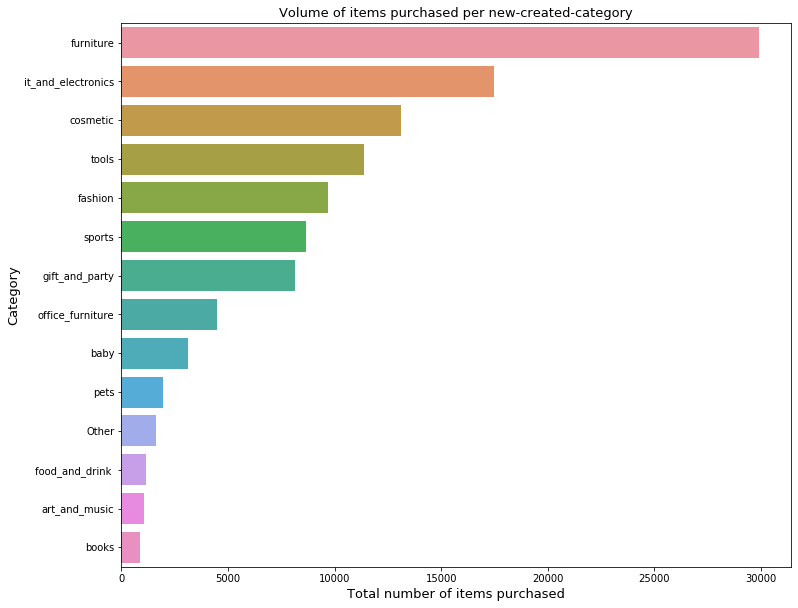

In [118]:
# Overview of the amount of items sold for each new category 
view_category = order_items.merge(products_dataset.loc[:,['product_id','product_category_name']],
                                  on='product_id',
                                  how='left')


view_category['product_category_name']=view_category['product_category_name'].map(dict_cat_name).fillna('Other')
view_category['product_category_name']

plt.figure(figsize=[12,10])
plt.title('Volume of items purchased per new-created-category',fontsize=13)
plt.xlabel('Total number of items purchased',fontsize=13)
plt.ylabel('Category',fontsize=13)

sns.barplot(x=view_category['product_category_name'].value_counts().head(20).values,
            y=view_category['product_category_name'].value_counts().head(20).index)



In [101]:
# As seen in the map all we need from this table is the category of a product, let's drop the rest
products_dataset=products_dataset.loc[:,['product_id','product_category_name']]
products_dataset

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,cosmetic
1,3aa071139cb16b67ca9e5dea641aaa2f,art_and_music
2,96bd76ec8810374ed1b65e291975717f,sports
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,furniture
...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,furniture
32947,bf4538d88321d0fd4412a93c974510e6,tools
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,furniture
32949,83808703fc0706a22e264b9d75f04a2e,it_and_electronics


## Merge Product - Items 

In [102]:
# Here we just merge the items dataset with the product categories we made in the previous section 

order_items=order_items.merge(products_dataset,on='product_id',how='left')
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,gift_and_party
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pets
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,cosmetic
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,tools
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,furniture
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,it_and_electronics
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,it_and_electronics


## Seller-customer-distance

The purpose of this section is to add a feature 'distance_seller_customer' to our items 

In [111]:
# Adding Latitude + Longitude to customer table
customer=customer.merge(geoloc.drop_duplicates(subset=['geolocation_zip_code_prefix']),
                                how='left',
                                left_on=['customer_zip_code_prefix'],
                                right_on=['geolocation_zip_code_prefix'])

customer.rename(columns = {'geolocation_lat':'lat_customer',
                           'geolocation_lng':'long_customer'}, inplace = True)

customer=customer.loc[:,['customer_id','customer_unique_id','customer_state','lat_customer','long_customer']]
customer

,customer_id,customer_unique_id,customer_state,lat_customer,long_customer
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,-20.509897,-47.397866
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,SP,-23.726853,-46.545746
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,SP,-23.527788,-46.660310
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,SP,-23.496930,-46.185352
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,SP,-22.987222,-47.151073
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,SP,-23.587901,-46.501830
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,SP,-23.612294,-46.765787
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,CE,-3.744128,-38.510859
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,RS,-29.956391,-51.167614


In [117]:
# Adding Latitude + Longitude to sellers table

sellers=sellers.merge(geoloc.drop_duplicates(subset=['geolocation_zip_code_prefix']),
                                how='left',
                                left_on=['seller_zip_code_prefix'],
                                right_on=['geolocation_zip_code_prefix'])



sellers.rename(columns = {'geolocation_lat':'lat_seller',
                          'geolocation_lng':'long_seller'}, inplace = True)

sellers=sellers.loc[:,['seller_id','lat_seller','long_seller']]

sellers

,seller_id,lat_seller,long_seller
0,3442f8959a84dea7ee197c632cb2df15,-22.898536,-47.063125
1,d1b65fc7debc3361ea86b5f14c68d2e2,-22.382941,-46.946641
2,ce3ad9de960102d0677a81f5d0bb7b2d,-22.910641,-43.176510
3,c0f3eea2e14555b6faeea3dd58c1b1c3,-23.657250,-46.610759
4,51a04a8a6bdcb23deccc82b0b80742cf,-22.971648,-46.533618
...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,-23.456431,-51.866369
3091,f8201cab383e484733266d1906e2fdfa,-27.623801,-48.674286
3092,74871d19219c7d518d0090283e03c137,-23.659845,-46.677882
3093,e603cf3fec55f8697c9059638d6c8eb5,-31.744231,-52.328761


In [120]:
# Getting lat+ long of each item's seller

order_items=order_items.merge(sellers,on='seller_id',how='left')
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,lat_seller,long_seller
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,gift_and_party,-22.498183,-44.123614
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pets,-23.566258,-46.518417
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture,-22.264094,-46.158564
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,cosmetic,-20.548228,-47.395897
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,tools,-22.931427,-53.133759
...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,furniture,-26.912429,-48.677381
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,it_and_electronics,-23.535536,-46.643052
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports,-25.469214,-49.293935
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,it_and_electronics,-23.636657,-46.694780


In [124]:
# Getting lat + long of each customer
order_items=order_items.merge(customer.loc[:,['customer_unique_id','lat_customer','long_customer']],
                              on='customer_unique_id',
                              how='left')
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,lat_seller,long_seller,customer_unique_id,lat_customer,long_customer
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,gift_and_party,-22.498183,-44.123614,871766c5855e863f6eccc05f988b23cb,-21.758076,-41.312633
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pets,-23.566258,-46.518417,eb28e67c4c0b83846050ddfb8a35d051,-20.212393,-50.941471
2,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pets,-23.566258,-46.518417,eb28e67c4c0b83846050ddfb8a35d051,-20.212393,-50.941471
3,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture,-22.264094,-46.158564,3818d81c6709e39d06b2738a8d3a2474,-19.860439,-44.597972
4,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,cosmetic,-20.548228,-47.395897,af861d436cfc08b2c2ddefd0ba074622,-23.144923,-46.539830
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122106,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,furniture,-26.912429,-48.677381,0c9aeda10a71f369396d0c04dce13a64,-2.490420,-44.303287
122107,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,it_and_electronics,-23.535536,-46.643052,0da9fe112eae0c74d3ba1fe16de0988b,-25.601485,-49.317700
122108,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports,-25.469214,-49.293935,cd79b407828f02fdbba457111c38e4c4,-23.597813,-46.650272
122109,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,it_and_electronics,-23.636657,-46.694780,eb803377c9315b564bdedad672039306,-23.036935,-46.982526


In [125]:
# Calculate the distance between two points based on their latitude and longitude 
# (for each row in order_items table)

R = 6373.0
order_items["dist_seller_customer"]=0

for i in range(order_items.shape[0]):

    lat1 = math.radians(order_items.iloc[i,8])
    lon1 = math.radians(order_items.iloc[i,9])
    lat2 = math.radians(order_items.iloc[i,11])
    lon2 = math.radians(order_items.iloc[i,12])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance = R * c
    order_items.iloc[i,13]=distance

order_items 

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,lat_seller,long_seller,customer_unique_id,lat_customer,long_customer,dist_seller_customer
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,gift_and_party,-22.498183,-44.123614,871766c5855e863f6eccc05f988b23cb,-21.758076,-41.312633,301.100157
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pets,-23.566258,-46.518417,eb28e67c4c0b83846050ddfb8a35d051,-20.212393,-50.941471,589.459127
2,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pets,-23.566258,-46.518417,eb28e67c4c0b83846050ddfb8a35d051,-20.212393,-50.941471,589.459127
3,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture,-22.264094,-46.158564,3818d81c6709e39d06b2738a8d3a2474,-19.860439,-44.597972,312.593145
4,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,cosmetic,-20.548228,-47.395897,af861d436cfc08b2c2ddefd0ba074622,-23.144923,-46.539830,302.046543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122106,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,furniture,-26.912429,-48.677381,0c9aeda10a71f369396d0c04dce13a64,-2.490420,-44.303287,2756.179440
122107,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,it_and_electronics,-23.535536,-46.643052,0da9fe112eae0c74d3ba1fe16de0988b,-25.601485,-49.317700,354.960247
122108,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports,-25.469214,-49.293935,cd79b407828f02fdbba457111c38e4c4,-23.597813,-46.650272,338.933583
122109,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,it_and_electronics,-23.636657,-46.694780,eb803377c9315b564bdedad672039306,-23.036935,-46.982526,72.893352


## Merge Items with Orders 

In [150]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122111 entries, 0 to 122110
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               122111 non-null  object 
 1   order_item_id          122111 non-null  int64  
 2   product_id             122111 non-null  object 
 3   seller_id              122111 non-null  object 
 4   shipping_limit_date    122111 non-null  object 
 5   price                  122111 non-null  float64
 6   freight_value          122111 non-null  float64
 7   product_category_name  122111 non-null  object 
 8   lat_seller             121828 non-null  float64
 9   long_seller            121828 non-null  float64
 10  customer_unique_id     122111 non-null  object 
 11  lat_customer           121785 non-null  float64
 12  long_customer          121785 non-null  float64
 13  dist_seller_customer   121503 non-null  float64
dtypes: float64(7), int64(1), object(6)
m

Here we need to keep the following features : 
  * order_id (key between order_items and orders_dataset)
  * order_item_id (which will allow us to create the 'number of items' feature)
  * product_category_name
  * distance_seller_customer

We can drop the rest

In [133]:
columns_to_keep = ['order_id',
                   'order_item_id',
                   'product_category_name',
                   'dist_seller_customer']
order_items_to_merge=order_items.reindex(columns=columns_to_keep)
order_items_to_merge

,order_id,order_item_id,product_category_name,dist_seller_customer
0,00010242fe8c5a6d1ba2dd792cb16214,1,gift_and_party,301.100157
1,00018f77f2f0320c557190d7a144bdd3,1,pets,589.459127
2,00018f77f2f0320c557190d7a144bdd3,1,pets,589.459127
3,000229ec398224ef6ca0657da4fc703e,1,furniture,312.593145
4,00024acbcdf0a6daa1e931b038114c75,1,cosmetic,302.046543
...,...,...,...,...
122106,fffc94f6ce00a00581880bf54a75a037,1,furniture,2756.179440
122107,fffcd46ef2263f404302a634eb57f7eb,1,it_and_electronics,354.960247
122108,fffce4705a9662cd70adb13d4a31832d,1,sports,338.933583
122109,fffe18544ffabc95dfada21779c9644f,1,it_and_electronics,72.893352


In [135]:
# Creating OneHotEncoding features out of product_category_name
order_items_to_merge = pd.get_dummies(order_items_to_merge,columns=['product_category_name'])

#Removing the 'other' category 
order_items_to_merge.drop(columns='product_category_name_Other',inplace=True)
order_items_to_merge

,order_id,order_item_id,dist_seller_customer,product_category_name_art_and_music,product_category_name_baby,product_category_name_books,product_category_name_cosmetic,product_category_name_fashion,product_category_name_food_and_drink,product_category_name_furniture,product_category_name_gift_and_party,product_category_name_it_and_electronics,product_category_name_office_furniture,product_category_name_pets,product_category_name_sports,product_category_name_tools
0,00010242fe8c5a6d1ba2dd792cb16214,1,301.100157,0,0,0,0,0,0,0,1,0,0,0,0,0
1,00018f77f2f0320c557190d7a144bdd3,1,589.459127,0,0,0,0,0,0,0,0,0,0,1,0,0
2,00018f77f2f0320c557190d7a144bdd3,1,589.459127,0,0,0,0,0,0,0,0,0,0,1,0,0
3,000229ec398224ef6ca0657da4fc703e,1,312.593145,0,0,0,0,0,0,1,0,0,0,0,0,0
4,00024acbcdf0a6daa1e931b038114c75,1,302.046543,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122106,fffc94f6ce00a00581880bf54a75a037,1,2756.179440,0,0,0,0,0,0,1,0,0,0,0,0,0
122107,fffcd46ef2263f404302a634eb57f7eb,1,354.960247,0,0,0,0,0,0,0,0,1,0,0,0,0
122108,fffce4705a9662cd70adb13d4a31832d,1,338.933583,0,0,0,0,0,0,0,0,0,0,0,1,0
122109,fffe18544ffabc95dfada21779c9644f,1,72.893352,0,0,0,0,0,0,0,0,1,0,0,0,0


Here, before merging orders and items table, we need to group the items table by order_id. 

=>We will create a dictionnary to assign an agg_function to each feature 

In [146]:
value_ohe = []
for i in range(order_items_to_merge.shape[1]-1):
    if i == 0 : 
        value_ohe.append('count')
    elif i == 1:
        value_ohe.append('mean')
    else: 
        value_ohe.append('sum')

dict_agg = pd.Series(value_ohe,index=order_items_to_merge.columns[1:].tolist()).to_dict()
dict_agg

{'order_item_id': 'count',
 'dist_seller_customer': 'mean',
 'product_category_name_art_and_music': 'sum',
 'product_category_name_baby': 'sum',
 'product_category_name_books': 'sum',
 'product_category_name_cosmetic': 'sum',
 'product_category_name_fashion': 'sum',
 'product_category_name_food_and_drink ': 'sum',
 'product_category_name_furniture': 'sum',
 'product_category_name_gift_and_party': 'sum',
 'product_category_name_it_and_electronics': 'sum',
 'product_category_name_office_furniture': 'sum',
 'product_category_name_pets': 'sum',
 'product_category_name_sports': 'sum',
 'product_category_name_tools': 'sum'}

In [ ]:
# Saving the dictionnary to be able to re_use it late
with open('dict_agg_items.pickle', 'wb') as file:
    pickle.dump(dict_agg, file)

In [148]:
# Groupby 'order_id' according to the agg_functions stored in our dictionnary
order_items_to_merge = order_items_to_merge.groupby(by='order_id').agg(dict_agg)
order_items_to_merge

,order_item_id,dist_seller_customer,product_category_name_art_and_music,product_category_name_baby,product_category_name_books,product_category_name_cosmetic,product_category_name_fashion,product_category_name_food_and_drink,product_category_name_furniture,product_category_name_gift_and_party,product_category_name_it_and_electronics,product_category_name_office_furniture,product_category_name_pets,product_category_name_sports,product_category_name_tools
order_id,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,301.100157,0,0,0,0,0,0,0,1,0,0,0,0,0
00018f77f2f0320c557190d7a144bdd3,2,589.459127,0,0,0,0,0,0,0,0,0,0,2,0,0
000229ec398224ef6ca0657da4fc703e,1,312.593145,0,0,0,0,0,0,1,0,0,0,0,0,0
00024acbcdf0a6daa1e931b038114c75,1,302.046543,0,0,0,1,0,0,0,0,0,0,0,0,0
00042b26cf59d7ce69dfabb4e55b4fd9,1,646.424652,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,2756.179440,0,0,0,0,0,0,1,0,0,0,0,0,0
fffcd46ef2263f404302a634eb57f7eb,1,354.960247,0,0,0,0,0,0,0,0,1,0,0,0,0
fffce4705a9662cd70adb13d4a31832d,1,338.933583,0,0,0,0,0,0,0,0,0,0,0,1,0


In [89]:
# As mentionned before, here we drop the canceled and unavailable status
drop_status = ['canceled','unavailable']
orders_dataset.loc[~(orders_dataset['order_status'].isin(drop_status))]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [90]:
# Eventually merging orders and items 
orders_dataset=orders_dataset.merge(order_items_to_merge,left_on='order_id',how='left',right_index=True)


In [91]:
# Rename the order_item_id into 'nb_of_items'
orders_dataset.rename(columns={'order_item_id':'nb_of_items'},inplace=True)

## Merge Reviews with orders

In [159]:
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [162]:
# Groupby order_id the review review table : count review_id to obtain nb of review, get the mean review score 
order_reviews_to_merge = order_reviews.groupby(by='order_id').agg({'review_id':'count','review_score':'mean'})

# Rename the features according to their new meaning
order_reviews_to_merge.rename(columns={'review_id':'nb_of_reviews','review_score':'review_mean_score'},inplace=True)
order_reviews_to_merge

,nb_of_reviews,review_mean_score
order_id,,
00010242fe8c5a6d1ba2dd792cb16214,1,5.0
00018f77f2f0320c557190d7a144bdd3,1,4.0
000229ec398224ef6ca0657da4fc703e,1,5.0
00024acbcdf0a6daa1e931b038114c75,1,4.0
00042b26cf59d7ce69dfabb4e55b4fd9,1,5.0
...,...,...
fffc94f6ce00a00581880bf54a75a037,1,5.0
fffcd46ef2263f404302a634eb57f7eb,1,5.0
fffce4705a9662cd70adb13d4a31832d,1,5.0


In [163]:
#Merge Orders and reviews 
orders_dataset=orders_dataset.merge(order_reviews_to_merge,left_on='order_id',how='left',right_index=True)
orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,nb_of_items,dist_seller_customer,product_category_name_art_and_music,product_category_name_baby,product_category_name_books,product_category_name_cosmetic,product_category_name_fashion,product_category_name_food_and_drink,product_category_name_furniture,product_category_name_gift_and_party,product_category_name_it_and_electronics,product_category_name_office_furniture,product_category_name_pets,product_category_name_sports,product_category_name_tools,nb_of_reviews,review_mean_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,18.069507,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,856.561389,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,514.291730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,1823.372584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,30.183509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1.0,69.502849,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,474.247075,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,968.355085,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,370.263050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1,2.0


## Merge Payments with orders 

In [165]:
order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [166]:
# Use the order_payments cleaning function created in section 2.3.3
order_payments_to_merge=clean_payments(order_payments)
order_payments_to_merge.multi_payment_types

,multi_payment_types,multi_installments,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
order_id,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0,1,72.19,0,1,0,0
00018f77f2f0320c557190d7a144bdd3,0,1,259.83,0,1,0,0
000229ec398224ef6ca0657da4fc703e,0,1,216.87,0,1,0,0
00024acbcdf0a6daa1e931b038114c75,0,1,25.78,0,1,0,0
00042b26cf59d7ce69dfabb4e55b4fd9,0,1,218.04,0,1,0,0
...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,0,1,343.40,1,0,0,0
fffcd46ef2263f404302a634eb57f7eb,0,1,386.53,1,0,0,0
fffce4705a9662cd70adb13d4a31832d,0,1,116.85,0,1,0,0


In [168]:
order_payments_to_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99437 entries, 00010242fe8c5a6d1ba2dd792cb16214 to fffe41c64501cc87c801fd61db3f6244
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   multi_payment_types       99437 non-null  int64  
 1   multi_installments        99437 non-null  int64  
 2   payment_value             99437 non-null  float64
 3   payment_type_boleto       99437 non-null  uint8  
 4   payment_type_credit_card  99437 non-null  uint8  
 5   payment_type_debit_card   99437 non-null  uint8  
 6   payment_type_voucher      99437 non-null  uint8  
dtypes: float64(1), int64(2), uint8(4)
memory usage: 3.4+ MB


In [169]:
# Merge orders and order_payment table
orders_dataset=orders_dataset.merge(order_payments_to_merge,left_on='order_id',how='left',right_index=True)
orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,nb_of_items,dist_seller_customer,product_category_name_art_and_music,product_category_name_baby,product_category_name_books,product_category_name_cosmetic,product_category_name_fashion,product_category_name_food_and_drink,product_category_name_furniture,product_category_name_gift_and_party,product_category_name_it_and_electronics,product_category_name_office_furniture,product_category_name_pets,product_category_name_sports,product_category_name_tools,nb_of_reviews,review_mean_score,multi_payment_types,multi_installments,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,18.069507,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,1.0,1.0,38.71,0.0,1.0,0.0,2.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,856.561389,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,0.0,1.0,141.46,1.0,0.0,0.0,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,514.291730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5.0,0.0,1.0,179.12,0.0,1.0,0.0,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,1823.372584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,5.0,0.0,1.0,72.20,0.0,1.0,0.0,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,30.183509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,5.0,0.0,1.0,28.62,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1.0,69.502849,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,0.0,1.0,85.08,0.0,1.0,0.0,0.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,474.247075,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,0.0,1.0,195.00,0.0,1.0,0.0,0.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,968.355085,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,0.0,1.0,271.01,0.0,1.0,0.0,0.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,370.263050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1,2.0,0.0,1.0,441.16,0.0,1.0,0.0,0.0


## Orders Cleaning + Groupby Customer

In [171]:
# Here we trade the customer_id with the customer_unique_id 
orders_dataset=orders_dataset.merge(order_customer,on='order_id',how='left')
orders_dataset.drop(columns='customer_id',inplace=True)
orders_dataset

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,nb_of_items,dist_seller_customer,product_category_name_art_and_music,product_category_name_baby,product_category_name_books,product_category_name_cosmetic,product_category_name_fashion,product_category_name_food_and_drink,product_category_name_furniture,product_category_name_gift_and_party,product_category_name_it_and_electronics,product_category_name_office_furniture,product_category_name_pets,product_category_name_sports,product_category_name_tools,nb_of_reviews,review_mean_score,multi_payment_types,multi_installments,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,18.069507,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,1.0,1.0,38.71,0.0,1.0,0.0,2.0,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,856.561389,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,0.0,1.0,141.46,1.0,0.0,0.0,0.0,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,514.291730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5.0,0.0,1.0,179.12,0.0,1.0,0.0,0.0,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,1823.372584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,5.0,0.0,1.0,72.20,0.0,1.0,0.0,0.0,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,30.183509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,5.0,0.0,1.0,28.62,0.0,1.0,0.0,0.0,72632f0f9dd73dfee390c9b22eb56dd6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1.0,69.502849,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,0.0,1.0,85.08,0.0,1.0,0.0,0.0,6359f309b166b0196dbf7ad2ac62bb5a
99437,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,474.247075,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,0.0,1.0,195.00,0.0,1.0,0.0,0.0,da62f9e57a76d978d02ab5362c509660
99438,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,968.355085,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,0.0,1.0,271.01,0.0,1.0,0.0,0.0,737520a9aad80b3fbbdad19b66b37b30
99439,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,370.263050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1,2.0,0.0,1.0,441.16,0.0,1.0,0.0,0.0,5097a5312c8b157bb7be58ae360ef43c


In [177]:
# Changing the types of useful dates_features in our dataframe
orders_dataset['order_purchase_timestamp']=orders_dataset['order_purchase_timestamp'].astype('datetime64')
orders_dataset['order_delivered_customer_date']=orders_dataset['order_delivered_customer_date'].astype('datetime64')
orders_dataset['order_estimated_delivery_date']=orders_dataset['order_estimated_delivery_date'].astype('datetime64')

orders_dataset.dtypes

order_id                                            object
order_status                                        object
order_purchase_timestamp                    datetime64[ns]
order_approved_at                                   object
order_delivered_carrier_date                        object
order_delivered_customer_date               datetime64[ns]
order_estimated_delivery_date               datetime64[ns]
nb_of_items                                        float64
dist_seller_customer                               float64
product_category_name_art_and_music                float64
product_category_name_baby                         float64
product_category_name_books                        float64
product_category_name_cosmetic                     float64
product_category_name_fashion                      float64
product_category_name_food_and_drink               float64
product_category_name_furniture                    float64
product_category_name_gift_and_party               float

In [262]:
# Here we can drop some useless features 
final_data = orders_dataset.copy()
final_data.drop(columns=['order_status','order_approved_at','order_delivered_carrier_date'],inplace=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   order_id                                  99441 non-null  object        
 1   order_purchase_timestamp                  99441 non-null  datetime64[ns]
 2   order_delivered_customer_date             96476 non-null  datetime64[ns]
 3   order_estimated_delivery_date             99441 non-null  datetime64[ns]
 4   nb_of_items                               98666 non-null  float64       
 5   dist_seller_customer                      98666 non-null  float64       
 6   product_category_name_art_and_music       98666 non-null  float64       
 7   product_category_name_baby                98666 non-null  float64       
 8   product_category_name_books               98666 non-null  float64       
 9   product_category_name_cosmet

In [263]:
# We can also drop the remaining NaN
final_data.dropna(inplace=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96475 entries, 0 to 99440
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   order_id                                  96475 non-null  object        
 1   order_purchase_timestamp                  96475 non-null  datetime64[ns]
 2   order_delivered_customer_date             96475 non-null  datetime64[ns]
 3   order_estimated_delivery_date             96475 non-null  datetime64[ns]
 4   nb_of_items                               96475 non-null  float64       
 5   dist_seller_customer                      96475 non-null  float64       
 6   product_category_name_art_and_music       96475 non-null  float64       
 7   product_category_name_baby                96475 non-null  float64       
 8   product_category_name_books               96475 non-null  float64       
 9   product_category_name_cosmet

In [264]:
# As our study doesn't take into accound data before year 2016, we will keep only 2017 and 2018
final_data= final_data[final_data['order_purchase_timestamp'].dt.strftime('%Y').isin(['2017','2018'])]
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96204 entries, 0 to 99440
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   order_id                                  96204 non-null  object        
 1   order_purchase_timestamp                  96204 non-null  datetime64[ns]
 2   order_delivered_customer_date             96204 non-null  datetime64[ns]
 3   order_estimated_delivery_date             96204 non-null  datetime64[ns]
 4   nb_of_items                               96204 non-null  float64       
 5   dist_seller_customer                      96204 non-null  float64       
 6   product_category_name_art_and_music       96204 non-null  float64       
 7   product_category_name_baby                96204 non-null  float64       
 8   product_category_name_books               96204 non-null  float64       
 9   product_category_name_cosmet

In [265]:
# Creating a new feature 'purchasing_month' out of the purchasing date
final_data['purchasing_month']=final_data['order_purchase_timestamp'].dt.strftime('%B')
final_data['purchasing_month']

0         October
1            July
2          August
3        November
4        February
           ...   
99436       March
99437    February
99438      August
99439     January
99440       March
Name: purchasing_month, Length: 96204, dtype: object

In [266]:
# Creating 'late_delivery' feature: 
# Boolean : 1 if delivery_date is > estimated_delivery_date, else 0 

final_data['late_delivery']=final_data['order_estimated_delivery_date']<final_data['order_delivered_customer_date']
final_data['late_delivery']=final_data['late_delivery']*1

In [267]:
# Create feature 'delivery_lead_time': 
# difference between purchase date and delivery date 

final_data = calculate_days_difference(final_data,
                                      'order_purchase_timestamp',
                                      'order_delivered_customer_date',
                                      'delivery_lead_time')
final_data

,order_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,nb_of_items,dist_seller_customer,product_category_name_art_and_music,product_category_name_baby,product_category_name_books,product_category_name_cosmetic,product_category_name_fashion,product_category_name_food_and_drink,product_category_name_furniture,product_category_name_gift_and_party,product_category_name_it_and_electronics,product_category_name_office_furniture,product_category_name_pets,product_category_name_sports,product_category_name_tools,nb_of_reviews,review_mean_score,multi_payment_types,multi_installments,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,customer_unique_id,purchasing_month,late_delivery,delivery_lead_time
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,2.0,18.069507,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,1.0,1.0,38.71,0.0,1.0,0.0,2.0,7c396fd4830fd04220f754e42b4e5bff,October,0,8.436574
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,1.0,856.561389,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,0.0,1.0,141.46,1.0,0.0,0.0,0.0,af07308b275d755c9edb36a90c618231,July,0,13.782037
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,1.0,514.291730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5.0,0.0,1.0,179.12,0.0,1.0,0.0,0.0,3a653a41f6f9fc3d2a113cf8398680e8,August,0,9.394213
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,1.0,1823.372584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,5.0,0.0,1.0,72.20,0.0,1.0,0.0,0.0,7c142cf63193a1473d2e66489a9ae977,November,0,13.208750
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,1.0,30.183509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,5.0,0.0,1.0,28.62,0.0,1.0,0.0,0.0,72632f0f9dd73dfee390c9b22eb56dd6,February,0,2.873877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28,1.0,69.502849,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,0.0,1.0,85.08,0.0,1.0,0.0,0.0,6359f309b166b0196dbf7ad2ac62bb5a,March,0,8.218009
99437,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02,1.0,474.247075,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,0.0,1.0,195.00,0.0,1.0,0.0,0.0,da62f9e57a76d978d02ab5362c509660,February,0,22.193727
99438,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27,1.0,968.355085,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,0.0,1.0,271.01,0.0,1.0,0.0,0.0,737520a9aad80b3fbbdad19b66b37b30,August,0,24.859421
99439,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15,2.0,370.263050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1,2.0,0.0,1.0,441.16,0.0,1.0,0.0,0.0,5097a5312c8b157bb7be58ae360ef43c,January,0,17.086424


In [268]:
# Create feature 'xmas_customer' :
# Boolean : 1 if purchasing month is November or December, else 0 

final_data['xmas_customer']=(final_data['purchasing_month'].isin(['November','December']))*1
final_data

,order_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,nb_of_items,dist_seller_customer,product_category_name_art_and_music,product_category_name_baby,product_category_name_books,product_category_name_cosmetic,product_category_name_fashion,product_category_name_food_and_drink,product_category_name_furniture,product_category_name_gift_and_party,product_category_name_it_and_electronics,product_category_name_office_furniture,product_category_name_pets,product_category_name_sports,product_category_name_tools,nb_of_reviews,review_mean_score,multi_payment_types,multi_installments,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,customer_unique_id,purchasing_month,late_delivery,delivery_lead_time,xmas_customer
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,2.0,18.069507,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,1.0,1.0,38.71,0.0,1.0,0.0,2.0,7c396fd4830fd04220f754e42b4e5bff,October,0,8.436574,0
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,1.0,856.561389,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,0.0,1.0,141.46,1.0,0.0,0.0,0.0,af07308b275d755c9edb36a90c618231,July,0,13.782037,0
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,1.0,514.291730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5.0,0.0,1.0,179.12,0.0,1.0,0.0,0.0,3a653a41f6f9fc3d2a113cf8398680e8,August,0,9.394213,0
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,1.0,1823.372584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,5.0,0.0,1.0,72.20,0.0,1.0,0.0,0.0,7c142cf63193a1473d2e66489a9ae977,November,0,13.208750,1
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,1.0,30.183509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,5.0,0.0,1.0,28.62,0.0,1.0,0.0,0.0,72632f0f9dd73dfee390c9b22eb56dd6,February,0,2.873877,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28,1.0,69.502849,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,0.0,1.0,85.08,0.0,1.0,0.0,0.0,6359f309b166b0196dbf7ad2ac62bb5a,March,0,8.218009,0
99437,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02,1.0,474.247075,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,0.0,1.0,195.00,0.0,1.0,0.0,0.0,da62f9e57a76d978d02ab5362c509660,February,0,22.193727,0
99438,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27,1.0,968.355085,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,0.0,1.0,271.01,0.0,1.0,0.0,0.0,737520a9aad80b3fbbdad19b66b37b30,August,0,24.859421,0
99439,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15,2.0,370.263050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1,2.0,0.0,1.0,441.16,0.0,1.0,0.0,0.0,5097a5312c8b157bb7be58ae360ef43c,January,0,17.086424,0


In [269]:
# Transform 'purchasing_month' into OHE features
final_data = pd.get_dummies(final_data,columns=['purchasing_month'])
final_data

,order_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,nb_of_items,dist_seller_customer,product_category_name_art_and_music,product_category_name_baby,product_category_name_books,product_category_name_cosmetic,product_category_name_fashion,product_category_name_food_and_drink,product_category_name_furniture,product_category_name_gift_and_party,product_category_name_it_and_electronics,product_category_name_office_furniture,product_category_name_pets,product_category_name_sports,product_category_name_tools,nb_of_reviews,review_mean_score,multi_payment_types,multi_installments,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,customer_unique_id,late_delivery,delivery_lead_time,xmas_customer,purchasing_month_April,purchasing_month_August,purchasing_month_December,purchasing_month_February,purchasing_month_January,purchasing_month_July,purchasing_month_June,purchasing_month_March,purchasing_month_May,purchasing_month_November,purchasing_month_October,purchasing_month_September
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,2.0,18.069507,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,1.0,1.0,38.71,0.0,1.0,0.0,2.0,7c396fd4830fd04220f754e42b4e5bff,0,8.436574,0,0,0,0,0,0,0,0,0,0,0,1,0
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,1.0,856.561389,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,0.0,1.0,141.46,1.0,0.0,0.0,0.0,af07308b275d755c9edb36a90c618231,0,13.782037,0,0,0,0,0,0,1,0,0,0,0,0,0
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,1.0,514.291730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5.0,0.0,1.0,179.12,0.0,1.0,0.0,0.0,3a653a41f6f9fc3d2a113cf8398680e8,0,9.394213,0,0,1,0,0,0,0,0,0,0,0,0,0
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,1.0,1823.372584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,5.0,0.0,1.0,72.20,0.0,1.0,0.0,0.0,7c142cf63193a1473d2e66489a9ae977,0,13.208750,1,0,0,0,0,0,0,0,0,0,1,0,0
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,1.0,30.183509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,5.0,0.0,1.0,28.62,0.0,1.0,0.0,0.0,72632f0f9dd73dfee390c9b22eb56dd6,0,2.873877,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28,1.0,69.502849,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,0.0,1.0,85.08,0.0,1.0,0.0,0.0,6359f309b166b0196dbf7ad2ac62bb5a,0,8.218009,0,0,0,0,0,0,0,0,1,0,0,0,0
99437,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02,1.0,474.247075,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,0.0,1.0,195.00,0.0,1.0,0.0,0.0,da62f9e57a76d978d02ab5362c509660,0,22.193727,0,0,0,0,1,0,0,0,0,0,0,0,0
99438,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27,1.0,968.355085,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,0.0,1.0,271.01,0.0,1.0,0.0,0.0,737520a9aad80b3fbbdad19b66b37b30,0,24.859421,0,0,1,0,0,0,0,0,0,0,0,0,0
99439,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15,2.0,370.263050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1,2.0,0.0,1.0,441.16,0.0,1.0,0.0,0.0,5097a5312c8b157bb7be58ae360ef43c,0,17.086424,0,0,0,0,0,1,0,0,0,0,0,0,0


In [270]:
final_data.columns.tolist()

['order_id',
 'order_purchase_timestamp',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'nb_of_items',
 'dist_seller_customer',
 'product_category_name_art_and_music',
 'product_category_name_baby',
 'product_category_name_books',
 'product_category_name_cosmetic',
 'product_category_name_fashion',
 'product_category_name_food_and_drink ',
 'product_category_name_furniture',
 'product_category_name_gift_and_party',
 'product_category_name_it_and_electronics',
 'product_category_name_office_furniture',
 'product_category_name_pets',
 'product_category_name_sports',
 'product_category_name_tools',
 'nb_of_reviews',
 'review_mean_score',
 'multi_payment_types',
 'multi_installments',
 'payment_value',
 'payment_type_boleto',
 'payment_type_credit_card',
 'payment_type_debit_card',
 'payment_type_voucher',
 'customer_unique_id',
 'late_delivery',
 'delivery_lead_time',
 'xmas_customer',
 'purchasing_month_April',
 'purchasing_month_August',
 'purchasing_month_Decembe

In [271]:
# Sort data by date (ascending)
final_data.sort_values(by='order_purchase_timestamp',ascending=True,inplace=True)
final_data

,order_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,nb_of_items,dist_seller_customer,product_category_name_art_and_music,product_category_name_baby,product_category_name_books,product_category_name_cosmetic,product_category_name_fashion,product_category_name_food_and_drink,product_category_name_furniture,product_category_name_gift_and_party,product_category_name_it_and_electronics,product_category_name_office_furniture,product_category_name_pets,product_category_name_sports,product_category_name_tools,nb_of_reviews,review_mean_score,multi_payment_types,multi_installments,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,customer_unique_id,late_delivery,delivery_lead_time,xmas_customer,purchasing_month_April,purchasing_month_August,purchasing_month_December,purchasing_month_February,purchasing_month_January,purchasing_month_July,purchasing_month_June,purchasing_month_March,purchasing_month_May,purchasing_month_November,purchasing_month_October,purchasing_month_September
78768,ec7a019261fce44180373d45b442d78f,2017-01-05 11:56:06,2017-01-11 13:14:05,2017-02-01,2.0,11.647424,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,0.0,1.0,19.62,0.0,1.0,0.0,0.0,f7b981e8a280e455ac3cbe0d5d171bd1,0,6.054155,0,0,0,0,0,1,0,0,0,0,0,0,0
16201,b95a0a8bd30aece4e94e81f0591249d8,2017-01-05 12:01:20,2017-01-17 15:38:58,2017-02-13,4.0,11.647424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1,5.0,0.0,1.0,19.62,1.0,0.0,0.0,0.0,83e7958a94bd7f74a9414d8782f87628,0,12.151134,0,0,0,0,0,1,0,0,0,0,0,0,0
74670,38bcb524e1c38c2c1b60600a80fc8999,2017-01-05 12:06:36,2017-01-16 16:05:22,2017-02-13,3.0,13.122197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1,5.0,0.0,1.0,11.62,1.0,0.0,0.0,0.0,728e4a7d0db4845270091ded0923c71f,0,11.165810,0,0,0,0,0,1,0,0,0,0,0,0,0
15352,7a18a504c1a4b32d883e68de2e1a7db0,2017-01-05 12:09:08,2017-01-16 15:43:29,2017-02-13,3.0,13.122197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1,5.0,0.0,1.0,16.62,1.0,0.0,0.0,0.0,728e4a7d0db4845270091ded0923c71f,0,11.148854,0,0,0,0,0,1,0,0,0,0,0,0,0
27002,6acecf438369055d9243e121045cca74,2017-01-05 12:11:23,2017-01-17 16:06:30,2017-02-13,3.0,13.122197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1,5.0,0.0,1.0,18.62,1.0,0.0,0.0,0.0,728e4a7d0db4845270091ded0923c71f,0,12.163275,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99369,52018484704db3661b98ce838612b507,2018-08-29 12:25:59,2018-08-30 22:48:27,2018-09-03,1.0,18.934083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,1.0,73.10,0.0,1.0,0.0,0.0,7a22d14aa3c3599238509ddca4b93b01,0,1.432269,0,0,1,0,0,0,0,0,0,0,0,0,0
30077,0b223d92c27432930dfe407c6aea3041,2018-08-29 14:18:23,2018-08-30 16:24:55,2018-09-04,2.0,10.335781,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,0.0,1.0,510.96,0.0,1.0,0.0,0.0,5c58de6fb80e93396e2f35642666b693,0,1.087870,0,0,1,0,0,0,0,0,0,0,0,0,0
31486,168626408cb32af0ffaf76711caae1dc,2018-08-29 14:18:28,2018-08-30 16:52:31,2018-09-11,1.0,432.739209,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,0.0,1.0,61.29,0.0,0.0,0.0,1.0,7febafa06d9d8f232a900a2937f04338,0,1.106979,0,0,1,0,0,0,0,0,0,0,0,0,0
69678,03ef5dedbe7492bdae72eec50764c43f,2018-08-29 14:52:00,2018-08-30 16:36:59,2018-09-03,1.0,10.326375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,3.0,0.0,1.0,33.23,0.0,1.0,0.0,0.0,b701bebbdf478f5500348f03aff62121,0,1.072905,0,0,1,0,0,0,0,0,0,0,0,0,0


In [272]:
# Drop remaining useless features
final_data.drop(columns=['order_delivered_customer_date',
                         'order_estimated_delivery_date'],inplace=True)
final_data.columns.tolist()

['order_id',
 'order_purchase_timestamp',
 'nb_of_items',
 'dist_seller_customer',
 'product_category_name_art_and_music',
 'product_category_name_baby',
 'product_category_name_books',
 'product_category_name_cosmetic',
 'product_category_name_fashion',
 'product_category_name_food_and_drink ',
 'product_category_name_furniture',
 'product_category_name_gift_and_party',
 'product_category_name_it_and_electronics',
 'product_category_name_office_furniture',
 'product_category_name_pets',
 'product_category_name_sports',
 'product_category_name_tools',
 'nb_of_reviews',
 'review_mean_score',
 'multi_payment_types',
 'multi_installments',
 'payment_value',
 'payment_type_boleto',
 'payment_type_credit_card',
 'payment_type_debit_card',
 'payment_type_voucher',
 'customer_unique_id',
 'late_delivery',
 'delivery_lead_time',
 'xmas_customer',
 'purchasing_month_April',
 'purchasing_month_August',
 'purchasing_month_December',
 'purchasing_month_February',
 'purchasing_month_January',
 'pur

In [56]:
#Create one last agg_function dictionnary (so as to groupby customer_unique_id)
# First, create one list per agg_function containing the concerned features

col_mean =['dist_seller_customer',
           'review_mean_score',
           'delivery_lead_time']

col_sum = ['nb_of_items',
           'late_delivery',
           'product_category_name_art_and_music',
           'product_category_name_baby',
           'product_category_name_books',
           'product_category_name_cosmetic',
           'product_category_name_fashion',
           'product_category_name_food_and_drink ',
           'product_category_name_furniture',
           'product_category_name_gift_and_party',
           'product_category_name_it_and_electronics',
           'product_category_name_office_furniture',
           'product_category_name_pets',
           'product_category_name_sports',
           'product_category_name_tools',
           'nb_of_reviews',
           'payment_value',
           'payment_type_boleto',
           'payment_type_credit_card',
           'payment_type_debit_card',
           'payment_type_voucher',
           'purchasing_month_April',
           'purchasing_month_August',
           'purchasing_month_December',
           'purchasing_month_February',
           'purchasing_month_January',
           'purchasing_month_July',
           'purchasing_month_June',
           'purchasing_month_March',
           'purchasing_month_May',
           'purchasing_month_November',
           'purchasing_month_October',
           'purchasing_month_September']

col_count = ['order_id']


col_max = ['order_purchase_timestamp',
           'multi_payment_types',
           'multi_installments',
           'xmas_customer']

In [276]:
# Create a dictionnary:
# keys are the columns of our dataframe(without customer_unique_id which will become the index)
# values are the corresponding agg_function 
key_dict = final_data.columns.tolist()
key_dict.remove('customer_unique_id')

#create a list which will contain the dict_values
value_dict = []

# For each feature, add the name of the corresponding agg fucntion to the list
for i in range(final_data.shape[1]-1):
    
    if key_dict[i] in (col_count) : 
        value_dict.append('count')
        
    elif key_dict[i] in (col_mean):
        value_dict.append('mean')
        
    elif key_dict[i] in (col_max):
        value_dict.append('max')    
    else: 
        value_dict.append('sum')

# Create the dictionnary base on the two created list (keys and values)
dict_agg = pd.Series(value_dict,key_dict).to_dict()
dict_agg

{'order_id': 'count',
 'order_purchase_timestamp': 'max',
 'nb_of_items': 'sum',
 'dist_seller_customer': 'mean',
 'product_category_name_art_and_music': 'sum',
 'product_category_name_baby': 'sum',
 'product_category_name_books': 'sum',
 'product_category_name_cosmetic': 'sum',
 'product_category_name_fashion': 'sum',
 'product_category_name_food_and_drink ': 'sum',
 'product_category_name_furniture': 'sum',
 'product_category_name_gift_and_party': 'sum',
 'product_category_name_it_and_electronics': 'sum',
 'product_category_name_office_furniture': 'sum',
 'product_category_name_pets': 'sum',
 'product_category_name_sports': 'sum',
 'product_category_name_tools': 'sum',
 'nb_of_reviews': 'sum',
 'review_mean_score': 'mean',
 'multi_payment_types': 'max',
 'multi_installments': 'max',
 'payment_value': 'sum',
 'payment_type_boleto': 'sum',
 'payment_type_credit_card': 'sum',
 'payment_type_debit_card': 'sum',
 'payment_type_voucher': 'sum',
 'late_delivery': 'sum',
 'delivery_lead_time

In [60]:
# Save the dictionnary 
with open('dict_agg_orders.pickle', 'wb') as file:
    pickle.dump(dict_agg, file)

In [58]:
# Length of our dataframe columns is 42, so the dict_agg should have a length of 41 (without customer_id)
len(dict_agg)

41

In [278]:
# Groupby customer_unique_id, based on our agg_function dictionnary
final_data = final_data.groupby(by='customer_unique_id').agg(dict_agg)
final_data

,order_id,order_purchase_timestamp,nb_of_items,dist_seller_customer,product_category_name_art_and_music,product_category_name_baby,product_category_name_books,product_category_name_cosmetic,product_category_name_fashion,product_category_name_food_and_drink,product_category_name_furniture,product_category_name_gift_and_party,product_category_name_it_and_electronics,product_category_name_office_furniture,product_category_name_pets,product_category_name_sports,product_category_name_tools,nb_of_reviews,review_mean_score,multi_payment_types,multi_installments,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,late_delivery,delivery_lead_time,xmas_customer,purchasing_month_April,purchasing_month_August,purchasing_month_December,purchasing_month_February,purchasing_month_January,purchasing_month_July,purchasing_month_June,purchasing_month_March,purchasing_month_May,purchasing_month_November,purchasing_month_October,purchasing_month_September
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05-10 10:56:27,1.0,109.221890,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,0.0,1.0,141.90,0.0,1.0,0.0,0.0,0,6.411227,0,0,0,0,0,0,0,0,0,1,0,0,0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05-07 11:11:27,1.0,22.835438,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,0.0,1.0,27.19,0.0,1.0,0.0,0.0,0,3.285590,0,0,0,0,0,0,0,0,0,1,0,0,0
0000f46a3911fa3c0805444483337064,1,2017-03-10 21:05:03,1.0,517.477152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,3.0,0.0,1.0,86.22,0.0,1.0,0.0,0.0,0,25.731759,0,0,0,0,0,0,0,0,1,0,0,0,0
0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12 20:29:41,1.0,2482.055014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,4.0,0.0,1.0,43.62,0.0,1.0,0.0,0.0,0,20.037083,0,0,0,0,0,0,0,0,0,0,0,1,0
0004aac84e0df4da2b147fca70cf8255,1,2017-11-14 19:45:42,1.0,153.952780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,5.0,0.0,1.0,196.89,0.0,1.0,0.0,0.0,0,13.141134,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06-08 21:00:36,2.0,1997.315822,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,0.0,1.0,2067.42,0.0,1.0,0.0,0.0,0,27.514861,0,0,0,0,0,0,0,1,0,0,0,0,0
fffea47cd6d3cc0a88bd621562a9d061,1,2017-12-10 20:07:56,1.0,1525.816010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,0.0,1.0,84.58,0.0,1.0,0.0,0.0,0,30.097500,1,0,0,1,0,0,0,0,0,0,0,0,0
ffff371b4d645b6ecea244b27531430a,1,2017-02-07 15:49:16,1.0,1525.962972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5.0,0.0,1.0,112.46,0.0,1.0,0.0,0.0,0,14.872083,0,0,0,0,1,0,0,0,0,0,0,0,0


In [279]:
print('Review Columns:\n_______________\n')

for i in range(final_data.shape[1]):
    print(final_data.columns[i],'\n',final_data.iloc[:,i].value_counts(),'\n')

Review Columns:
_______________

order_id 
 1     90308
2      2562
3       180
4        28
5         9
6         5
7         3
15        1
9         1
Name: order_id, dtype: int64 

order_purchase_timestamp 
 2018-08-02 12:06:07    3
2018-04-11 10:48:14    3
2018-08-02 12:06:09    3
2018-07-28 13:11:22    3
2017-11-20 10:59:08    3
                      ..
2017-11-27 21:16:37    1
2018-06-04 17:42:39    1
2018-02-21 18:15:12    1
2018-03-08 18:39:11    1
2018-01-04 15:10:45    1
Name: order_purchase_timestamp, Length: 92851, dtype: int64 

nb_of_items 
 1.0      81357
2.0       6948
4.0       2409
3.0       1160
6.0        546
5.0        174
8.0        141
9.0        119
12.0        50
10.0        42
15.0        24
16.0        24
7.0         20
14.0        16
24.0         9
20.0         7
30.0         6
21.0         5
18.0         5
22.0         5
28.0         4
25.0         4
36.0         4
11.0         2
35.0         2
33.0         2
66.0         2
63.0         2
27.0         1
26.0

In [280]:
# Transform product_category features into percentage (percentage of total items bought)
col_percentage = final_data.columns[final_data.columns.str.contains('product_category_name')]
col_percentage

for col in col_percentage: 
    final_data[col]=final_data[col]/final_data['nb_of_items']
final_data['product_category_name_baby'].value_counts()

0.000000    90300
1.000000     2628
0.500000      126
0.333333       21
0.666667        9
0.250000        5
0.200000        4
0.142857        1
0.400000        1
0.285714        1
0.750000        1
Name: product_category_name_baby, dtype: int64

In [281]:
# Re-adding the latitude and longitude for customer (to have features covering the customer location)
final_data = final_data.merge(customer.drop_duplicates(subset=['customer_unique_id']),
                              on='customer_unique_id',
                              how='left',
                              left_index=True)
final_data.drop(columns=['customer_id', 'customer_state'], inplace=True)
final_data

,customer_unique_id,order_id,order_purchase_timestamp,nb_of_items,dist_seller_customer,product_category_name_art_and_music,product_category_name_baby,product_category_name_books,product_category_name_cosmetic,product_category_name_fashion,product_category_name_food_and_drink,product_category_name_furniture,product_category_name_gift_and_party,product_category_name_it_and_electronics,product_category_name_office_furniture,product_category_name_pets,product_category_name_sports,product_category_name_tools,nb_of_reviews,review_mean_score,multi_payment_types,multi_installments,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,late_delivery,delivery_lead_time,xmas_customer,purchasing_month_April,purchasing_month_August,purchasing_month_December,purchasing_month_February,purchasing_month_January,purchasing_month_July,purchasing_month_June,purchasing_month_March,purchasing_month_May,purchasing_month_November,purchasing_month_October,purchasing_month_September,lat_customer,long_customer
64012,0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05-10 10:56:27,1.0,109.221890,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,0.0,1.0,141.90,0.0,1.0,0.0,0.0,0,6.411227,0,0,0,0,0,0,0,0,0,1,0,0,0,-23.335331,-46.828647
24570,0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05-07 11:11:27,1.0,22.835438,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,0.0,1.0,27.19,0.0,1.0,0.0,0.0,0,3.285590,0,0,0,0,0,0,0,0,0,1,0,0,0,-23.567395,-46.792957
40832,0000f46a3911fa3c0805444483337064,1,2017-03-10 21:05:03,1.0,517.477152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,3.0,0.0,1.0,86.22,0.0,1.0,0.0,0.0,0,25.731759,0,0,0,0,0,0,0,0,1,0,0,0,0,-27.543787,-48.625680
57118,0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12 20:29:41,1.0,2482.055014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,4.0,0.0,1.0,43.62,0.0,1.0,0.0,0.0,0,20.037083,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.311011,-48.482884
81150,0004aac84e0df4da2b147fca70cf8255,1,2017-11-14 19:45:42,1.0,153.952780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,5.0,0.0,1.0,196.89,0.0,1.0,0.0,0.0,0,13.141134,1,0,0,0,0,0,0,0,0,0,1,0,0,-23.504368,-47.466156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89147,fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06-08 21:00:36,2.0,1997.315822,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,0.0,1.0,2067.42,0.0,1.0,0.0,0.0,0,27.514861,0,0,0,0,0,0,0,1,0,0,0,0,0,-8.363166,-36.559088
9810,fffea47cd6d3cc0a88bd621562a9d061,1,2017-12-10 20:07:56,1.0,1525.816010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,0.0,1.0,84.58,0.0,1.0,0.0,0.0,0,30.097500,1,0,0,1,0,0,0,0,0,0,0,0,0,-12.221792,-38.962517
69017,ffff371b4d645b6ecea244b27531430a,1,2017-02-07 15:49:16,1.0,1525.962972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5.0,0.0,1.0,112.46,0.0,1.0,0.0,0.0,0,14.872083,0,0,0,0,1,0,0,0,0,0,0,0,0,-11.829317,-55.496443
94891,ffff5962728ec6157033ef9805bacc48,1,2018-05-02 15:17:41,1.0,638.299795,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,0.0,1.0,133.69,0.0,1.0,0.0,0.0,0,11.858854,0,0,0,0,0,0,0,0,0,1,0,0,0,-21.125061,-41.666268


In [285]:
# Saving entire data merged 
final_data.to_csv (r'C:\Users\quent\Desktop\Formation_OCR\Projets\Projet_5\final_data2.csv', index = False, header=True)

# Merge Function time-based

In [158]:
def extract_data(year, month):
    
    # 1)import all required tables : 
    customer = pd.read_csv("olist_customers_dataset.csv")
    geoloc = pd.read_csv("olist_geolocation_dataset.csv")
    order_payments = pd.read_csv("olist_order_payments_dataset.csv")
    order_items = pd.read_csv("olist_order_items_dataset.csv")
    order_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
    orders_dataset = pd.read_csv("olist_orders_dataset.csv")
    products_dataset = pd.read_csv("olist_products_dataset.csv")
    sellers= pd.read_csv("olist_sellers_dataset.csv")
    
    with open('dict_cat_name.pickle', 'rb') as file:
        dict_cat_name = pickle.load(file)
    
    # Drop orders cancelled or unavailable
    drop_status = ['canceled', 'unavailable']
    orders_dataset = orders_dataset.loc[~(orders_dataset['order_status'].isin(drop_status))]
    
    # 2) Create a correspondance table for order_id - customer_unique_id
    order_customer = orders_dataset.loc[:,['order_id','customer_id']]
    order_customer = order_customer.merge(customer.loc[:,['customer_id','customer_unique_id']],on='customer_id',how='left')
    order_customer.drop(columns='customer_id',inplace=True)
    
    # 3) Change the products category names to a new category list (13 categories)
    products_dataset['product_category_name'] = products_dataset['product_category_name'].map(dict_cat_name).fillna('Other')
    
    # 4) Merge products_dataset with items dataset
    # Keep only product category name in products dataset
    products_dataset=products_dataset.loc[:,['product_id','product_category_name']]
    order_items=order_items.merge(products_dataset,on='product_id',how='left')
    
    
    # --------------------------------------------------------------------------------------------------
    # 5) Add a feature 'dist_seller_customer' to items dataset
    
    # 5.1) Keep only lat+ long on geoloc table 
    geoloc.drop(columns=['geolocation_city','geolocation_state'],inplace=True)
    
    # 5.2) Add Lat + Long to customer
    customer=customer.merge(geoloc.drop_duplicates(subset=['geolocation_zip_code_prefix']),
                            how='left',
                            left_on=['customer_zip_code_prefix'],
                            right_on=['geolocation_zip_code_prefix'])

    customer.rename(columns = {'geolocation_lat':'lat_customer',
                               'geolocation_lng':'long_customer'}, inplace = True)

    customer=customer.loc[:,['customer_id','customer_unique_id','customer_state','lat_customer','long_customer']]
    
    # 5.3) Add Lat + Long to seller
    sellers=sellers.merge(geoloc.drop_duplicates(subset=['geolocation_zip_code_prefix']),
                          how='left',
                          left_on=['seller_zip_code_prefix'],
                          right_on=['geolocation_zip_code_prefix'])



    sellers.rename(columns = {'geolocation_lat':'lat_seller',
                              'geolocation_lng':'long_seller'}, inplace = True)

    sellers=sellers.loc[:,['seller_id','lat_seller','long_seller']]
    
    # 5.4) Merge items + sellers 
    order_items=order_items.merge(sellers,on='seller_id',how='left')
    
    # 5.5) Get the corresponding customer_unique_id for each order_id 
    order_items=order_items.merge(order_customer,on='order_id',how='left')
    
    # 5.6) Merge items + customers
    order_items=order_items.merge(customer.loc[:,['customer_unique_id','lat_customer','long_customer']],
                              on='customer_unique_id',
                              how='left')
    
    # 5.7) Calculate feature 'dist_seller_customer'
    R = 6373.0
    order_items["dist_seller_customer"]=0

    for i in range(order_items.shape[0]):

        lat1 = math.radians(order_items.iloc[i,order_items.columns.get_loc('lat_seller')])
        lon1 = math.radians(order_items.iloc[i,order_items.columns.get_loc('long_seller')])
        lat2 = math.radians(order_items.iloc[i,order_items.columns.get_loc('lat_customer')])
        lon2 = math.radians(order_items.iloc[i,order_items.columns.get_loc('long_customer')])

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

        distance = R * c
        order_items.iloc[i,order_items.columns.get_loc('dist_seller_customer')]=distance
    # --------------------------------------------------------------------------------------------------

    # 6) Clean items dataset before merging with orders dataset 
    
    # Keep useful features
    columns_to_keep = ['order_id',
                   'order_item_id',
                   'product_category_name',
                   'dist_seller_customer']
    order_items_to_merge=order_items.reindex(columns=columns_to_keep)
    
    # Transform category_name into OHE features 
    order_items_to_merge = pd.get_dummies(order_items_to_merge,columns=['product_category_name'])
    order_items_to_merge.drop(columns='product_category_name_Other',inplace=True)
    
    # Load the items_agg_dictionnary :
    
    with open('dict_agg_items.pickle', 'rb') as file:
        dict_agg_items=pickle.load(file)
    
    # Keep one line per order_id, with specific agg function for each feature 
    order_items_to_merge = order_items_to_merge.groupby(by='order_id').agg(dict_agg_items)
    
    # 7) Merge  orders_dataset and items_dataset
    orders_dataset=orders_dataset.merge(order_items_to_merge,left_on = 'order_id',how = 'left',right_index=True)
    
    # Change order_item_id name into 'nb_of_items'
    orders_dataset.rename(columns={'order_item_id':'nb_of_items'},inplace=True)
    
    # 8) Re-shape review table before merge 
    order_reviews_to_merge = order_reviews.groupby(by='order_id').agg({'review_id':'count','review_score':'mean'})
    order_reviews_to_merge.rename(columns={'review_id':'nb_of_reviews','review_score':'review_mean_score'},inplace=True)

    # 9) Merge orders_dataset with review table 
    orders_dataset=orders_dataset.merge(order_reviews_to_merge,left_on = 'order_id',how = 'left',right_index=True)

    # 10) Re-shape Order_payments table before merge
    # 10.1) drop 'not_defined' payment_type
    order_payments = order_payments.loc[~(order_payments['payment_type'] == 'not_defined')]
    
    # 10.2) GroupyBy Order_id (+ transform payment_type into OHE features)
    order_payments = pd.get_dummies(order_payments,columns=['payment_type'])
    order_payments['payment_sequential'] = 1
    order_payments = order_payments.groupby(by='order_id').sum()
    
    # 10.3) Transform payment_sequential and payment_installment into boolean features
    order_payments.loc[order_payments['payment_sequential'] == 1,'payment_sequential'] = 0
    order_payments.loc[order_payments['payment_sequential'] > 1,'payment_sequential'] = 1
    order_payments.rename(columns = {'payment_sequential':'multi_payment_types'}, inplace = True)

    order_payments.loc[order_payments['payment_installments'] == 0,'payment_installments'] = 0
    order_payments.loc[order_payments['payment_installments'] > 0,'payment_installments'] = 1
    order_payments.rename(columns = {'payment_installments':'multi_installments'}, inplace = True)

    # 10.4) Reindex final payment table to prevent new payment categories from appearing
    with open('final_col_pay.pickle', 'rb') as file:
        final_col=pickle.load(file)
    order_payments = order_payments.reindex(columns=final_col)
    
    #Fill in the NaN of potential OHE payment type which is not found in new dataset 
    order_payments.fillna(0,inplace=True)
    
    # 11) Merge Orders_dataset and order_payments table
    orders_dataset=orders_dataset.merge(order_payments,left_on='order_id',how = 'left',right_index=True)

    # 12) Replace customer_id by customer unique id 
    orders_dataset=orders_dataset.merge(order_customer,on='order_id',how = 'left')
    orders_dataset.drop(columns='customer_id',inplace=True)
    
    # 13) Change usefull date_feature into datetype 
    orders_dataset['order_purchase_timestamp']=orders_dataset['order_purchase_timestamp'].astype('datetime64')
    orders_dataset['order_delivered_customer_date']=orders_dataset['order_delivered_customer_date'].astype('datetime64')
    orders_dataset['order_estimated_delivery_date']=orders_dataset['order_estimated_delivery_date'].astype('datetime64')
    
    # 14) Drop useless date_features (+ create the final_data which will be return by this function)
    final_data = orders_dataset.copy()
    final_data.drop(columns=['order_status','order_approved_at','order_delivered_carrier_date'],inplace=True)
    final_data.dropna(inplace=True)
    

    
    # 15) Create new features:  purchasing month, late delivery, delivery lead time, xmas customer
    final_data['purchasing_month']=final_data['order_purchase_timestamp'].dt.strftime('%B')
    
    final_data['late_delivery']=final_data['order_estimated_delivery_date']<final_data['order_delivered_customer_date']
    final_data['late_delivery']=final_data['late_delivery'] * 1
    
    final_data['delivery_lead_time'] = final_data['order_delivered_customer_date'] - final_data['order_purchase_timestamp']
    final_data['delivery_lead_time']=final_data['delivery_lead_time']/np.timedelta64(1,'h') / 24
    
    final_data['xmas_customer']=(final_data['purchasing_month'].isin(['November','December'])) * 1
    
    # Turn purchasing month into OHE_features
    final_data = pd.get_dummies(final_data,columns=['purchasing_month'])
    
    # Drop useless timestamps
    final_data.drop(columns=['order_delivered_customer_date','order_estimated_delivery_date'],inplace=True)
    
    # 16) Handle the data threshold part 
    date_max = datetime.datetime(year,month,1)
    date_min = datetime.datetime(2017,1,1)
    
    final_data=final_data.loc[((orders_dataset['order_purchase_timestamp'] >= date_min) &
                               (orders_dataset['order_purchase_timestamp'] < date_max))]    
    # 17) GroupeBy customer 
    
    with open('dict_agg_orders.pickle', 'rb') as file:
        dict_agg_orders=pickle.load(file)
        
    # print('Dict: {}\nColumns: {}'.format(dict_agg_orders,final_data.columns))
    
    final_data = final_data.groupby(by='customer_unique_id').agg(dict_agg_orders)
    final_data.rename(columns={'order_id':'nb_of_orders'},inplace=True)

    
    # 18) Turn category names into percentage 
    
    col_percentage = final_data.columns[final_data.columns.str.contains('product_category_name')]

    for col in col_percentage: 
        final_data[col]=final_data[col]/final_data['nb_of_items']

    # 19) Get lat + long for each customer    
    final_data = final_data.merge(customer.drop_duplicates(subset = ['customer_unique_id']),
                                  on='customer_unique_id',
                                  how='left',
                                  left_index = True)
    final_data.drop(columns=['customer_id','customer_state'],inplace=True)
    
    # 20) Transform order_purchase_timestamp into recency feature 
    # We create 3 Categories here:  
    # 0 for less than 3months purchase, 
    # 1 for purchase between 3 and 6 months, 
    # 2 for purchase older than 6 month
    
    final_data['order_purchase_timestamp'] = final_data['order_purchase_timestamp'].apply(lambda x: (date_max-x).days)

    final_data.loc[final_data['order_purchase_timestamp'] <= 90, 'order_purchase_timestamp'] = 0
    final_data.loc[(final_data['order_purchase_timestamp'] > 90) &
                   (final_data['order_purchase_timestamp'] <= 180), 'order_purchase_timestamp'] = 1
    
    final_data.loc[final_data['order_purchase_timestamp'] > 180, 'order_purchase_timestamp'] = 2

    final_data.rename(columns={'order_purchase_timestamp':'recency'},inplace=True)

    
    # Merge Done 
    return final_data

In [42]:
# Extract data from jan 2017 to august 2017
data_first20k=extract_data(2017,9)
data_first20k

,customer_unique_id,nb_of_orders,recency,nb_of_items,dist_seller_customer,product_category_name_art_and_music,product_category_name_baby,product_category_name_books,product_category_name_cosmetic,product_category_name_fashion,...,purchasing_month_January,purchasing_month_July,purchasing_month_June,purchasing_month_March,purchasing_month_May,purchasing_month_November,purchasing_month_October,purchasing_month_September,lat_customer,long_customer
40832,0000f46a3911fa3c0805444483337064,1,1,1.0,517.477152,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,-27.543787,-48.625680
58742,0005e1862207bf6ccc02e4228effd9a0,1,1,1.0,245.667440,0.0,0.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,0,-22.403254,-43.001980
63482,0006fdc98a402fceb4eb0ee528f6a8d4,1,0,1.0,776.359877,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,-21.061422,-41.371778
6940,000a5ad9c4601d2bbdd9ed765d5213b3,1,0,1.0,837.051657,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,-30.017690,-51.191212
11737,000de6019bb59f34c099a907c151d855,1,0,2.0,258.358625,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,-23.826105,-45.435803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80782,fff1afc79f6b5db1e235a4a6c30ceda7,1,0,1.0,726.939361,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,-27.634768,-52.280294
57564,fff3a9369e4b7102fab406a334a678c3,1,0,1.0,741.236998,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,-15.799190,-47.870102
89147,fffcf5a5ff07b0908bd4e2dbc735a684,1,0,2.0,1997.315822,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,-8.363166,-36.559088
69017,ffff371b4d645b6ecea244b27531430a,1,2,1.0,1525.962972,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,-11.829317,-55.496443


In [43]:
# Extract data: [jan17-dec17]
data_next20k=extract_data(2018,1)
data_next20k

,customer_unique_id,nb_of_orders,recency,nb_of_items,dist_seller_customer,product_category_name_art_and_music,product_category_name_baby,product_category_name_books,product_category_name_cosmetic,product_category_name_fashion,...,purchasing_month_January,purchasing_month_July,purchasing_month_June,purchasing_month_March,purchasing_month_May,purchasing_month_November,purchasing_month_October,purchasing_month_September,lat_customer,long_customer
40832,0000f46a3911fa3c0805444483337064,1,2,1.0,517.477152,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,-27.543787,-48.625680
57118,0000f6ccb0745a6a4b88665a16c9f078,1,0,1.0,2482.055014,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,-1.311011,-48.482884
81150,0004aac84e0df4da2b147fca70cf8255,1,0,1.0,153.952780,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,-23.504368,-47.466156
58742,0005e1862207bf6ccc02e4228effd9a0,1,2,1.0,245.667440,0.0,0.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,0,-22.403254,-43.001980
63482,0006fdc98a402fceb4eb0ee528f6a8d4,1,1,1.0,776.359877,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,-21.061422,-41.371778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,fffbf87b7a1a6fa8b03f081c5f51a201,1,0,1.0,2368.370077,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,-3.749335,-38.523619
89147,fffcf5a5ff07b0908bd4e2dbc735a684,1,2,2.0,1997.315822,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,-8.363166,-36.559088
9810,fffea47cd6d3cc0a88bd621562a9d061,1,0,1.0,1525.816010,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,-12.221792,-38.962517
69017,ffff371b4d645b6ecea244b27531430a,1,2,1.0,1525.962972,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,-11.829317,-55.496443


In [44]:
data_first20k.to_csv (r'C:\Users\quent\Desktop\Formation_OCR\Projets\Projet_5\data_first20k.csv', index = False, header=True)
data_next20k.to_csv (r'C:\Users\quent\Desktop\Formation_OCR\Projets\Projet_5\data_second20k.csv', index = False, header=True)

In [45]:
#Extract Data: [jan17-nov17]
data_nov17=extract_data(2017,12)
data_nov17

,customer_unique_id,nb_of_orders,recency,nb_of_items,dist_seller_customer,product_category_name_art_and_music,product_category_name_baby,product_category_name_books,product_category_name_cosmetic,product_category_name_fashion,...,purchasing_month_January,purchasing_month_July,purchasing_month_June,purchasing_month_March,purchasing_month_May,purchasing_month_November,purchasing_month_October,purchasing_month_September,lat_customer,long_customer
40832,0000f46a3911fa3c0805444483337064,1,2,1.0,517.477152,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,-27.543787,-48.625680
57118,0000f6ccb0745a6a4b88665a16c9f078,1,0,1.0,2482.055014,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,-1.311011,-48.482884
81150,0004aac84e0df4da2b147fca70cf8255,1,0,1.0,153.952780,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,-23.504368,-47.466156
58742,0005e1862207bf6ccc02e4228effd9a0,1,2,1.0,245.667440,0.0,0.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,0,-22.403254,-43.001980
63482,0006fdc98a402fceb4eb0ee528f6a8d4,1,1,1.0,776.359877,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,-21.061422,-41.371778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31613,fff699c184bcc967d62fa2c6171765f7,1,0,1.0,514.305127,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,-23.962450,-46.314988
24733,fffa431dd3fcdefea4b1777d114144f2,1,0,1.0,447.406487,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,-22.151826,-42.418110
89147,fffcf5a5ff07b0908bd4e2dbc735a684,1,1,2.0,1997.315822,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,-8.363166,-36.559088
69017,ffff371b4d645b6ecea244b27531430a,1,2,1.0,1525.962972,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,-11.829317,-55.496443


In [46]:
#Extract Data: [jan17-fev18]
data_fev18=extract_data(2018,3)
data_fev18

,customer_unique_id,nb_of_orders,recency,nb_of_items,dist_seller_customer,product_category_name_art_and_music,product_category_name_baby,product_category_name_books,product_category_name_cosmetic,product_category_name_fashion,...,purchasing_month_January,purchasing_month_July,purchasing_month_June,purchasing_month_March,purchasing_month_May,purchasing_month_November,purchasing_month_October,purchasing_month_September,lat_customer,long_customer
40832,0000f46a3911fa3c0805444483337064,1,2,1.0,517.477152,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,-27.543787,-48.625680
57118,0000f6ccb0745a6a4b88665a16c9f078,1,1,1.0,2482.055014,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,-1.311011,-48.482884
81150,0004aac84e0df4da2b147fca70cf8255,1,1,1.0,153.952780,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,-23.504368,-47.466156
63263,00053a61a98854899e70ed204dd4bafe,1,0,2.0,503.130499,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,-25.429683,-49.274635
58742,0005e1862207bf6ccc02e4228effd9a0,1,2,1.0,245.667440,0.0,0.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,0,-22.403254,-43.001980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,fffbf87b7a1a6fa8b03f081c5f51a201,1,0,1.0,2368.370077,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,-3.749335,-38.523619
89147,fffcf5a5ff07b0908bd4e2dbc735a684,1,2,2.0,1997.315822,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,-8.363166,-36.559088
9810,fffea47cd6d3cc0a88bd621562a9d061,1,0,1.0,1525.816010,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,-12.221792,-38.962517
69017,ffff371b4d645b6ecea244b27531430a,1,2,1.0,1525.962972,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,-11.829317,-55.496443


In [47]:
data_nov17.to_csv (r'C:\Users\quent\Desktop\Formation_OCR\Projets\Projet_5\data_nov17.csv', index = False, header=True)
data_fev18.to_csv (r'C:\Users\quent\Desktop\Formation_OCR\Projets\Projet_5\data_fev18.csv', index = False, header=True)

In [48]:
#Extract Data: [jan17-may18]
data_may18=extract_data(2018,6)
data_may18
data_may18.to_csv (r'C:\Users\quent\Desktop\Formation_OCR\Projets\Projet_5\data_may18.csv', index = False, header=True)